<b>
Name : Anish Rajesh Adnani
<br>
USC ID : 4092610491
<br>
USC Email ID : adnani@usc.edu
<br>
Github Username : midnightbot
<br>
    </b>

<b> (1) Time Series Classification Part 1: Feature Creation/Extraction <b>


<b> An interesting task in machine learning is classification of time series. In this problem,
we will classify the activities of humans based on time series obtained by a Wireless
Sensor Network. </b>

In [1]:
## Basic imports
import pandas as pd  ## reading the data
import openpyxl  ## Optional dependency for reading excel using pandas
import bootstrapped.bootstrap as bs  ## used for calculating confidence intervals
import numpy as np  ## used for numpy arrays
import bootstrapped.stats_functions as bs_stats  ## used for calculating std
import copy  ## used to make a copy of list
import seaborn as sns ## used to data visualization
from sklearn.model_selection import KFold  ## used for cross validation
from sklearn.model_selection import StratifiedKFold  ## used for cross validation
from sklearn.linear_model import LogisticRegression  ## used for Logistic Regression
from sklearn.linear_model import LogisticRegressionCV  ## used for Logistic Regression Cross Validation
from sklearn.feature_selection import RFECV  ## used for feature selection
import sys
from sklearn.metrics import roc_curve  ## used for calculating roc
from sklearn.metrics import roc_auc_score  ## used to find auc
from sklearn.metrics import auc  ## used for calculating auc
from sklearn.feature_selection import chi2  ## used for calculating p values
from sklearn.metrics import confusion_matrix  ## used for making confusion matrix
import matplotlib.pyplot as plt ## used for plot
from imblearn.over_sampling import SMOTE  ## used for up-sampling minority class
from sklearn.preprocessing import MinMaxScaler  ## used for normalization
from sklearn.preprocessing import normalize   ## used for normalization
from sklearn.naive_bayes import GaussianNB  ## gaussian naive bayes
from sklearn.naive_bayes import MultinomialNB  ## multinomial naive bayes
%matplotlib inline

<b> 1 .(a) Download the AReM data from:
https://archive.ics.uci.edu/ml/datasets/
Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\
%29
. The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity.
1
Each file containis 6 time series collected from activities
of the same person, which are called avg
rss12, var
rss12, avg
rss13, var
rss13,
vg
rss23, and ar
rss23. There are 88 instances in the dataset, each of which con-
tains 6 time series and each time series has 480 consecutive values </b>

In [2]:
## Data Consists of 7 folders -> 7 types of activities
## each folder has multiple files, each representing an instant of human performing an activity
## each file has 6 timeseries of the same person
## timeseries =~ features
## total there are 88 instances in dataset (88 files in the dataset)
## each file has 480 timeseries values

In [3]:
data_folder_location = '../data/AReM/'
data_folders = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
test_data_ranges = [2, 2, 3, 3, 3, 3, 3]
train_data_ranges = [7, 6, 15, 15, 15, 15, 15]

<b> 1.(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data </b>

In [4]:
def custom_csv_file_reader(fileName):
    """
    Reads the csv file (space seperated or comma seperated) and returns the DataFrame
    Parameters : fileName (A Path Containing some csv Dataset)
    Return : file_data (DataFrame)
    """
    df_a = pd.read_csv(fileName, skiprows=482, sep=','  , engine='python')
    df_b = pd.read_csv(fileName, skiprows=482, sep='\s+'  , engine='python')
    #print(fileName)
    #print(df_a)
    ## csv file is comma seperated
    if df_a.shape[1] == 7:
        file_data = pd.read_csv(fileName, skiprows = 4, sep=','  , engine='python')
        
        
    ## csv file is space seperated
    if df_b.shape[1] == 7:
        file_data = pd.read_csv(fileName, skiprows = 5, sep='\s+'  , engine='python', header=None)
        file_data.columns = ["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
    #print(file_data.columns)
    return file_data
        
        

In [5]:
print("Started Creating Train and Test Data")
print("=====================================================================================\n")
train_data = {}
test_data = {}
full_data = {}
"""
skip the first 4 rows which contains the following
Task
Frequency (Hz)
Clock (millisecond)
Duration (seconds)
NOTE ** -> cycling folder dataset9.csv, cycling folder dataset14.csv had extra commas in the last line
"""

## making the test_data
for x in range(len(data_folders)):
    for y in range(1, test_data_ranges[x] + 1):
        file_name = data_folder_location + data_folders[x] + "/" + "dataset" + str(y) + ".csv"
        file_data = custom_csv_file_reader(file_name)
        test_data[file_name] = file_data
        
        
print("All Test Data Files are")
print(list(test_data.keys()))
print("=====================================================================================\n")
## making the train_data
for x in range(len(data_folders)):
    for y in range(test_data_ranges[x]+1, train_data_ranges[x]+1):
        file_name = data_folder_location + data_folders[x] + "/" + "dataset" + str(y) + ".csv"
        file_data = custom_csv_file_reader(file_name)
        train_data[file_name] = file_data
        

## making the full_data
for x in range(len(data_folders)):
    for y in range(1, train_data_ranges[x]+1):
        file_name = data_folder_location + data_folders[x] + "/" + "dataset" + str(y) + ".csv"
        file_data = custom_csv_file_reader(file_name)
        full_data[file_name] = file_data
        
print("All Train Data Files are")
print(list(train_data.keys()))
print("=====================================================================================\n")

Started Creating Train and Test Data

All Test Data Files are
['../data/AReM/bending1/dataset1.csv', '../data/AReM/bending1/dataset2.csv', '../data/AReM/bending2/dataset1.csv', '../data/AReM/bending2/dataset2.csv', '../data/AReM/cycling/dataset1.csv', '../data/AReM/cycling/dataset2.csv', '../data/AReM/cycling/dataset3.csv', '../data/AReM/lying/dataset1.csv', '../data/AReM/lying/dataset2.csv', '../data/AReM/lying/dataset3.csv', '../data/AReM/sitting/dataset1.csv', '../data/AReM/sitting/dataset2.csv', '../data/AReM/sitting/dataset3.csv', '../data/AReM/standing/dataset1.csv', '../data/AReM/standing/dataset2.csv', '../data/AReM/standing/dataset3.csv', '../data/AReM/walking/dataset1.csv', '../data/AReM/walking/dataset2.csv', '../data/AReM/walking/dataset3.csv']

All Train Data Files are
['../data/AReM/bending1/dataset3.csv', '../data/AReM/bending1/dataset4.csv', '../data/AReM/bending1/dataset5.csv', '../data/AReM/bending1/dataset6.csv', '../data/AReM/bending1/dataset7.csv', '../data/AReM/be

<b> 1. (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this
problem, we focus on time-domain features.</b>

<b> 1. (c) (i) Research what types of time-domain features are usually used in time series
classification and list them (examples are minimum, maximum, mean, etc).</b>

<b> Reference https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

** Simple Statistical Features
- Mean
- Median
- Standard Deviation
- Minimum Value
- Maximum Value
- Skewness, Kurtosis
    
** Time Series Analysis Related Features
- Cross-Correlations
- Auto-Correlations
- Parameters of AR part
- Parameters of MA part
</b>

<b> 1.(c) (ii) Extract the time-domain features minimum, maximum, mean, median, stan-
dard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them
directly</b>

In [6]:
## new data will have 88 lines (1 line for each file)
## new data will have 42 columns 
## (min,max, mean, median,std,1st quartile, 3rd quartile) * for features (avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23)
dataset_columns = []
time_domain_fts = ["min", "max", "mean","median" ,"std", "first_quartile", "third_quartile"]
columnnames = test_data["../data/AReM/bending1/dataset1.csv"].columns
columnnames = list(columnnames[1:])

print(columnnames)
print("======================================\n")

for x in columnnames:
    for y in time_domain_fts:
        dataset_columns.append(y+"_"+x)
print(dataset_columns)      
print(len(dataset_columns))
print("======================================\n")



all_rows = []
for dfs in full_data:
    this_row = []
    for cols in columnnames:
        arr = full_data[dfs][cols]
    
        min_of_arr = arr.min()
        max_of_arr = arr.max()
        mean_of_arr = arr.mean()
        median_of_arr = arr.median()
        std_of_arr = arr.std()
        first_quartile_of_arr = arr.quantile(0.25)
        third_quartile_of_arr = arr.quantile(0.75)
        
        this_ft_data = [min_of_arr, max_of_arr, mean_of_arr,median_of_arr ,std_of_arr, first_quartile_of_arr, third_quartile_of_arr]
        
        this_row+=this_ft_data
    all_rows.append(this_row)        
    
print("Time Domain Feature Data ==>")
time_domain_feature_data = pd.DataFrame(data=all_rows, columns = dataset_columns)
print(time_domain_feature_data)
print("Time Domain Feature Data Shape ==> ", time_domain_feature_data.shape)


['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

['min_avg_rss12', 'max_avg_rss12', 'mean_avg_rss12', 'median_avg_rss12', 'std_avg_rss12', 'first_quartile_avg_rss12', 'third_quartile_avg_rss12', 'min_var_rss12', 'max_var_rss12', 'mean_var_rss12', 'median_var_rss12', 'std_var_rss12', 'first_quartile_var_rss12', 'third_quartile_var_rss12', 'min_avg_rss13', 'max_avg_rss13', 'mean_avg_rss13', 'median_avg_rss13', 'std_avg_rss13', 'first_quartile_avg_rss13', 'third_quartile_avg_rss13', 'min_var_rss13', 'max_var_rss13', 'mean_var_rss13', 'median_var_rss13', 'std_var_rss13', 'first_quartile_var_rss13', 'third_quartile_var_rss13', 'min_avg_rss23', 'max_avg_rss23', 'mean_avg_rss23', 'median_avg_rss23', 'std_avg_rss23', 'first_quartile_avg_rss23', 'third_quartile_avg_rss23', 'min_var_rss23', 'max_var_rss23', 'mean_var_rss23', 'median_var_rss23', 'std_var_rss23', 'first_quartile_var_rss23', 'third_quartile_var_rss23']
42

Time Domain Feature Data ==>
    min_avg_rss1

<b> 1. (c) (iii) Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootsrap confidence interval for the standard deviation
of each feature</b>

In [7]:
temp_arr = []
for i in time_domain_feature_data.columns:
    col_data = time_domain_feature_data[i]
    std_of_col = col_data.std()
    temp_arr.append([i,std_of_col])
    
print("Standard Deviation of all Time Domain Features == > ")
display_pd = pd.DataFrame(columns = ["Time Domain Feature", "Standard Deviation"], data = temp_arr)
display_pd

Standard Deviation of all Time Domain Features == > 


,Time Domain Feature,Standard Deviation
0,min_avg_rss12,9.569975
1,max_avg_rss12,4.394362
2,mean_avg_rss12,5.335718
3,median_avg_rss12,5.440054
4,std_avg_rss12,1.772153
5,first_quartile_avg_rss12,6.153590
6,third_quartile_avg_rss12,5.138925
7,min_var_rss12,0.000000
8,max_var_rss12,5.062729
9,mean_var_rss12,1.574164


In [8]:
temp_arr2 = []
lower_bound = []
upper_bound = []
for i in time_domain_feature_data.columns:
    col_data = time_domain_feature_data[i]
    col_data = np.array(col_data)
    bootstrap_confidence_interval = bs.bootstrap(col_data, stat_func = bs_stats.std, alpha = 0.1)
    lower_bound.append(bootstrap_confidence_interval.lower_bound)
    upper_bound.append(bootstrap_confidence_interval.upper_bound)
    
temp_arr2 = copy.deepcopy(temp_arr)
for x in range(len(temp_arr2)):
    temp_arr2[x].append(lower_bound[x])
    temp_arr2[x].append(upper_bound[x])
    
print("90% Confidence Interval of all Time Domain Features ==> ")
display_pd1 = pd.DataFrame(columns = ["Time Domain Feature", "Standard Deviation", "Lower Bound", "Upper Bound"], data = temp_arr2)
display_pd1

90% Confidence Interval of all Time Domain Features ==> 


,Time Domain Feature,Standard Deviation,Lower Bound,Upper Bound
0,min_avg_rss12,9.569975,8.353499,10.818620
1,max_avg_rss12,4.394362,3.479671,5.416380
2,mean_avg_rss12,5.335718,4.777995,5.921860
3,median_avg_rss12,5.440054,4.854244,6.050561
4,std_avg_rss12,1.772153,1.586448,1.964042
5,first_quartile_avg_rss12,6.153590,5.628730,6.706785
6,third_quartile_avg_rss12,5.138925,4.413281,5.920104
7,min_var_rss12,0.000000,0.000000,0.000000
8,max_var_rss12,5.062729,4.688001,5.468930
9,mean_var_rss12,1.574164,1.434526,1.743335


<b> 1. (c) (iv) Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max)</b>

Mean : Whenever the data is continous, the mean tends to provide a general overall idea of the data

Standard Deviation : Standard Deviation will help us measure the dispersion of data from the mean, basically roughly helps us estimate how the data is dispersed

Median : Gives the central point of the data which will help us get a central idea about the data. It is also less affected by outliers/noise

<b> Q.2 ISLR 3.7.4</b>

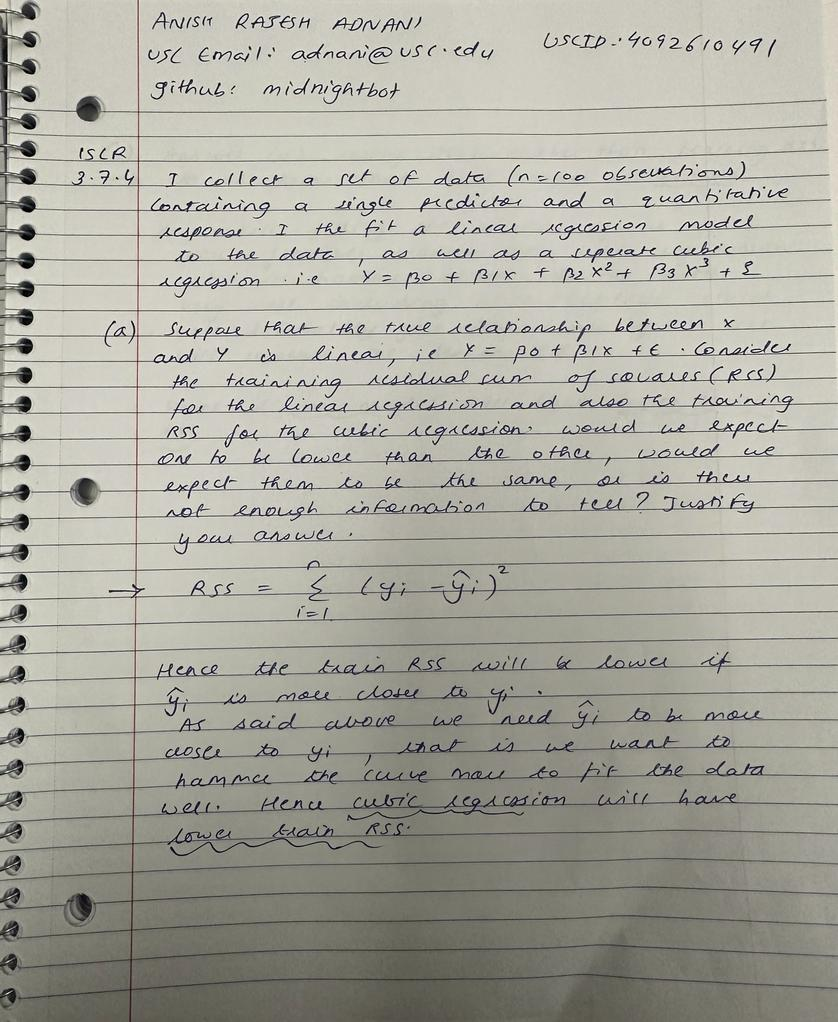

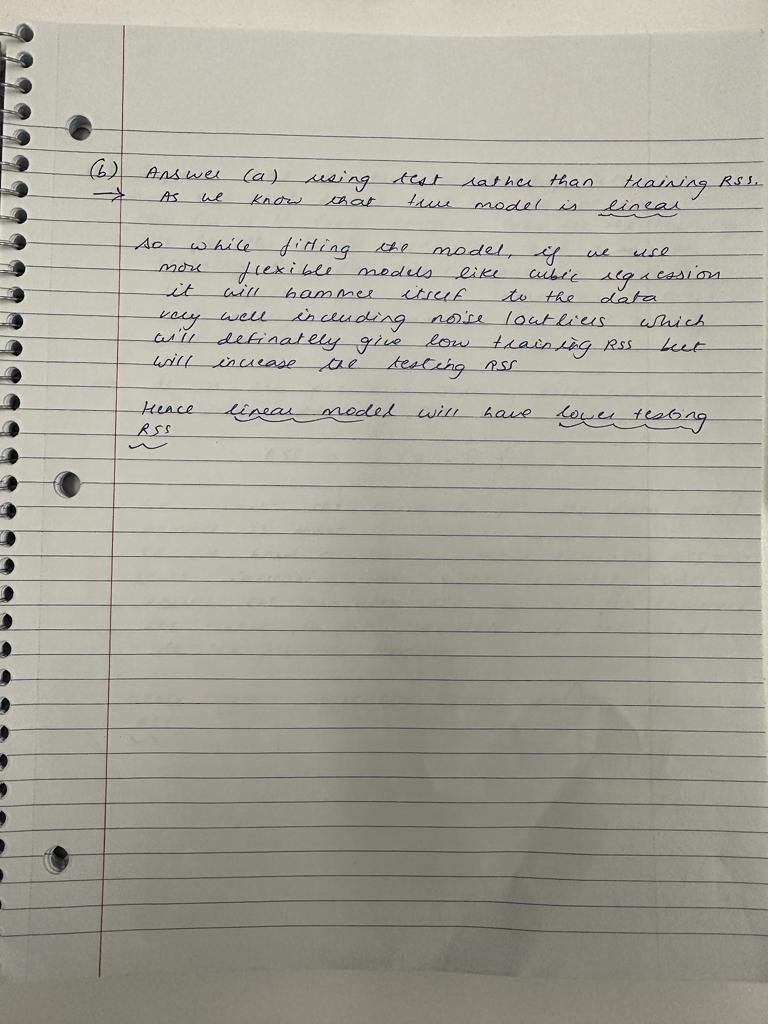

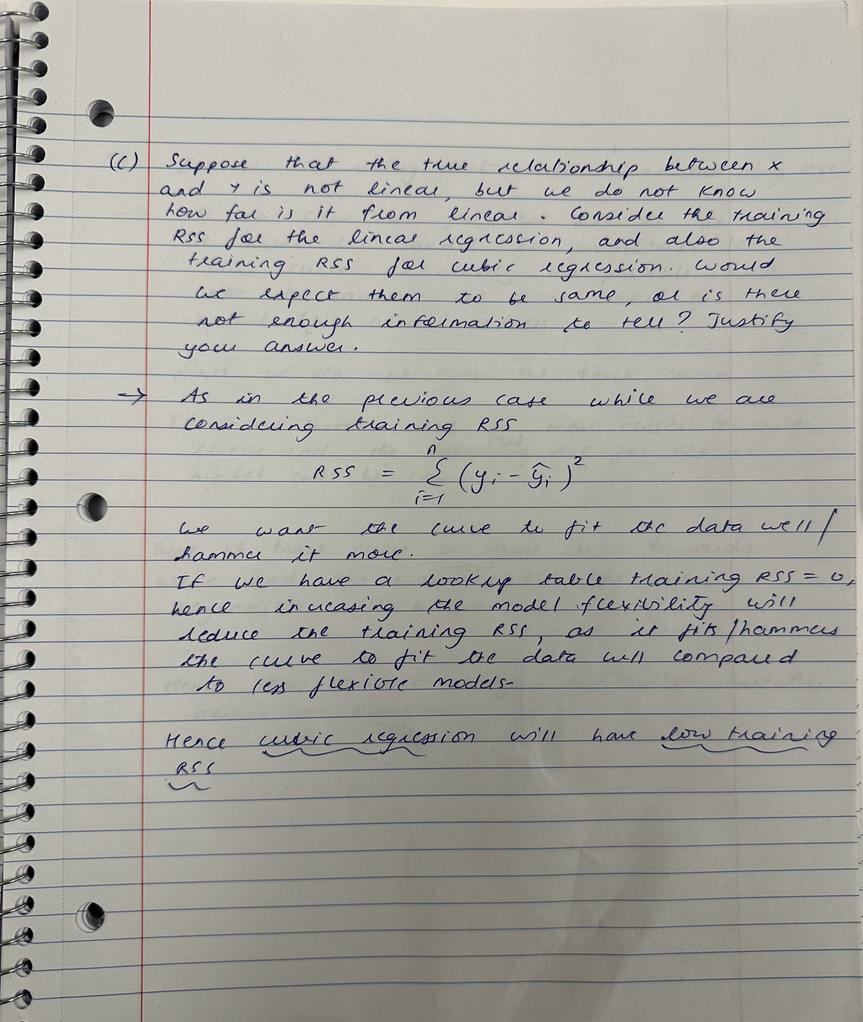

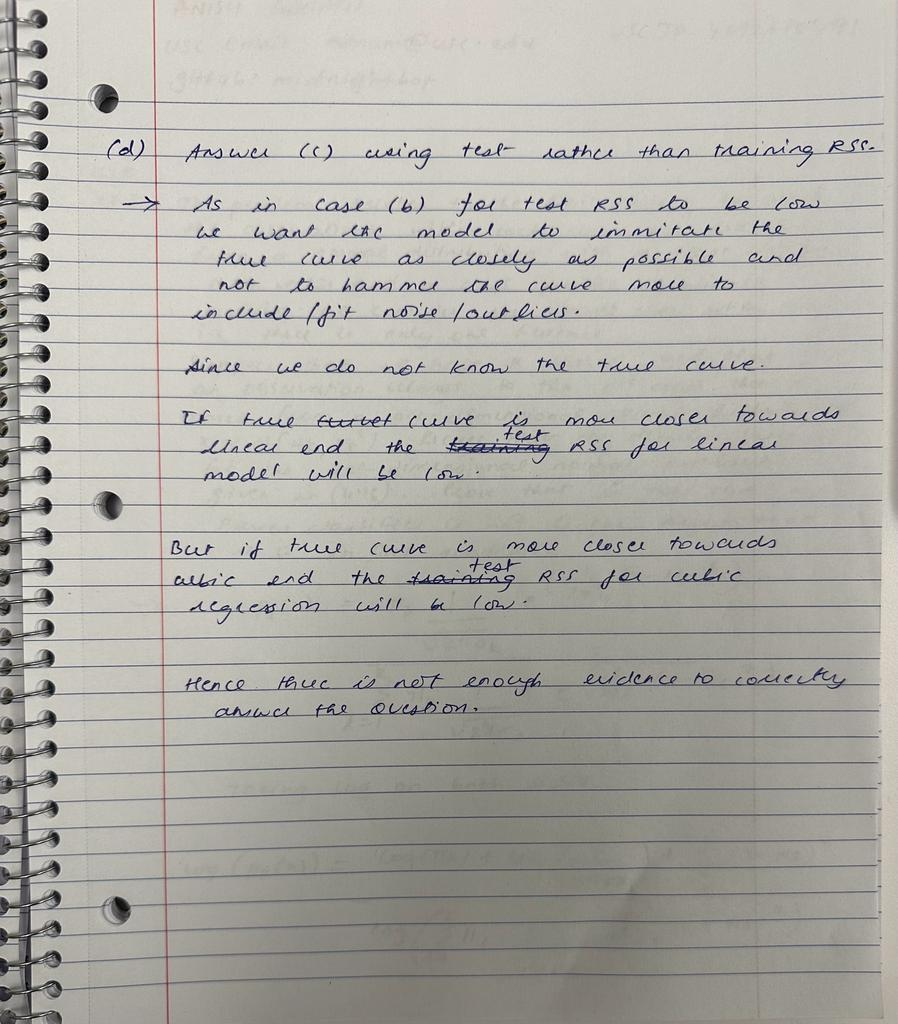

https://github.com/DSCI-552/homework-3-midnightbot/blob/main/Adnani_Anish_HW3_ISLR3.7.4.pdf

# STARTING HW4 FROM HERE

<b> Q.4 Time Series Classification Part 2: Binary and Multiclass Classification
Important Note: You will NOT submit this part with Homework 3. How-
ever, because it uses the features you extracted from time series data in
Homework 3, and because some of you may want to start using your fea-
tures to build models earlier, you are provided with the instructions of the
next programming assignment. Thus, you may want to submit the code
for Homework 3 with Homework 4 again, since it might need the feature
creation code. Also, since this part involves building various models, you
are strongly recommended to start as early as you can.</b>

<b> (a)
Binary Classification Using Logistic Regression
</b> 

<b> Q4.(a) (i) Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook).</b>

In [9]:
def extract_ft_value(arr, ft_type):
    """
    Takes in an array and finds 'ft_type' of arr
    Parameters : arr (Input Array), ft_type (which operation is to be performed on array)
    Return : returns 'ft_type' of arr
    """
    if ft_type == "mean":
        return arr.mean()
    
    elif ft_type == "std":
        return arr.std()
    
    elif ft_type == "median":
        return arr.median()
    
    elif ft_type == "min":
        return arr.min()
    
    elif ft_type == "max":
        return arr.max()

In [10]:
## we have to consider 1,2,6 feature of each instance [avg_rss12, var_rss12, var_rss23]
## so 9 X 9 plot
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","var_rss23"]
new_training_data = []

new_training_data_cols = []

for x in considered_fts:
    for y in best_time_domain_fts:
        new_training_data_cols.append(y + "_" + x)
        
new_training_data_cols.append("class")

for instance in train_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]
    
    this_data = train_data[instance]
    this_row = []
    for f in considered_fts:
        arr = this_data[f]
        ft1 = extract_ft_value(arr, best_time_domain_fts[0])
        ft2 = extract_ft_value(arr, best_time_domain_fts[1])
        ft3 = extract_ft_value(arr, best_time_domain_fts[2])
        
        this_row.append(ft1)
        this_row.append(ft2)
        this_row.append(ft3)
    if this_class in bending_classes:
        this_row.append("bending")
    else:
        this_row.append("not-bending")
        
    new_training_data.append(this_row)

new_training_df = pd.DataFrame(data=new_training_data, columns = new_training_data_cols)
display(new_training_df)

,mean_avg_rss12,std_avg_rss12,median_avg_rss12,mean_var_rss12,std_var_rss12,median_var_rss12,mean_var_rss23,std_var_rss23,median_var_rss23,class
0,43.954500,1.558835,44.33,0.426250,0.338690,0.470,0.493292,0.513506,0.43,bending
1,42.179812,3.670666,43.50,0.696042,0.630860,0.500,0.613521,0.524317,0.50,bending
2,41.678063,2.243490,41.75,0.535979,0.405469,0.500,0.383292,0.389164,0.43,bending
3,43.454958,1.386098,43.25,0.378083,0.315566,0.470,0.679646,0.622534,0.50,bending
4,43.969125,1.618364,44.50,0.413125,0.263111,0.470,0.555312,0.487826,0.49,bending
...,...,...,...,...,...,...,...,...,...,...
64,33.586875,4.650935,34.25,4.576562,2.461077,4.260,3.259729,1.640243,3.11,not-bending
65,34.322750,4.752477,35.25,4.456333,2.599284,3.900,3.432563,1.732727,3.20,not-bending
66,34.546229,4.842294,35.25,4.371958,2.360448,4.135,3.338125,1.656742,3.08,not-bending
67,34.873229,4.531720,35.25,4.380583,2.435437,3.925,3.424646,1.690960,3.27,not-bending


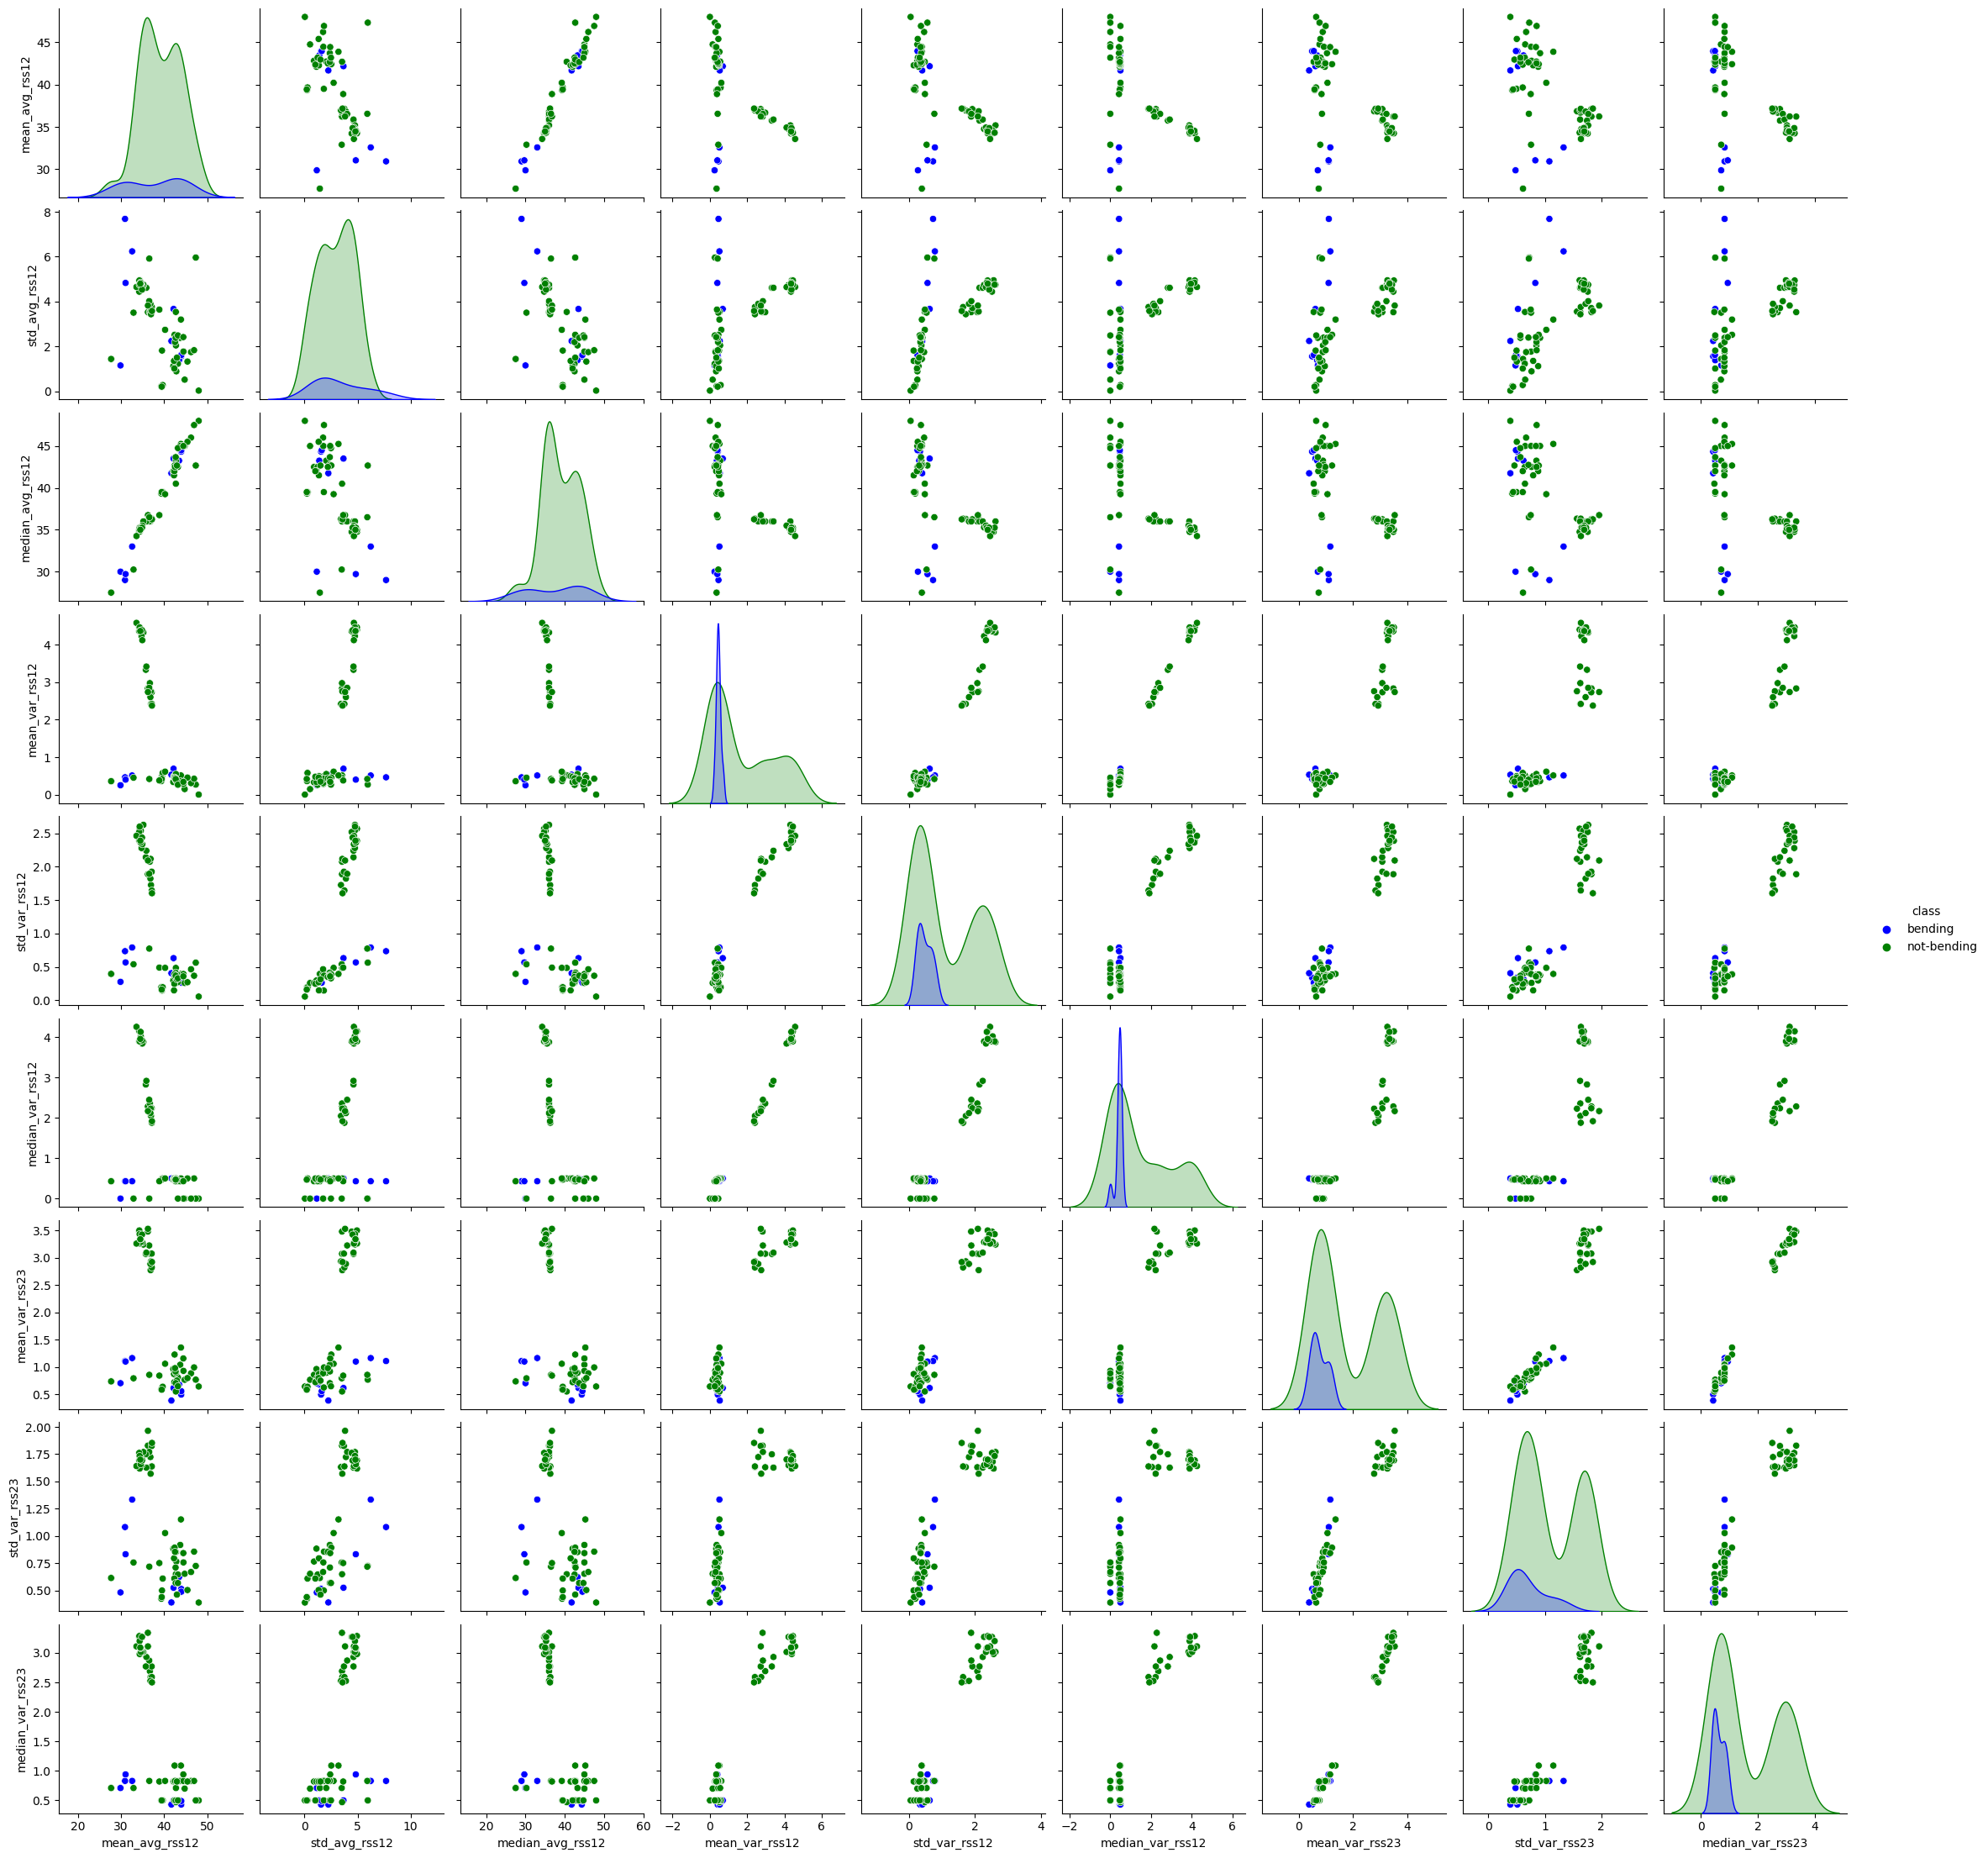

In [11]:
sns.pairplot(data=new_training_df, hue='class', palette={'bending':'blue', 'not-bending':'green'})

<b> Q.4 (a) (ii) Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 4(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable difference in
the results with those of 4(a)i?</b>

In [12]:
## we have to consider 1,2,6 feature of each instance [avg_rss12, var_rss12, var_rss23]
## so 9 X 9 plot
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","var_rss23"]
new_training_data1 = []
new_training_data_cols1 = []

new_training_data2 = []
new_training_data_cols2 = []
for x in considered_fts:
    for y in best_time_domain_fts:
        new_training_data_cols1.append(y + "_" + x)
        
new_training_data_cols1.append("class")

for x in considered_fts:
    for y in best_time_domain_fts:
        new_training_data_cols2.append(y + "_" + x)
        
new_training_data_cols2.append("class")

for instance in train_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]
    
    this_data = train_data[instance]
    this_row1 = []
    this_row2 = []
    for f in considered_fts:
        arr = this_data[f]
        arr = np.array_split(arr,2)
        ft1_1 = extract_ft_value(arr[0], best_time_domain_fts[0])
        ft1_2 = extract_ft_value(arr[1], best_time_domain_fts[0])
        ft2_1 = extract_ft_value(arr[0], best_time_domain_fts[1])
        ft2_2 = extract_ft_value(arr[1], best_time_domain_fts[1])
        ft3_1 = extract_ft_value(arr[0], best_time_domain_fts[2])
        ft3_2 = extract_ft_value(arr[1], best_time_domain_fts[2])
        
        this_row1.append(ft1_1)
        this_row1.append(ft2_1)
        this_row1.append(ft3_1)
        this_row2.append(ft1_2)
        this_row2.append(ft2_2)
        this_row2.append(ft3_2)
        
    if this_class in bending_classes:
        this_row1.append("bending")
        this_row2.append("bending")
    else:
        this_row1.append("not-bending")
        this_row2.append("not-bending")
        
    new_training_data1.append(this_row1)
    new_training_data2.append(this_row2)

new_training_df1 = pd.DataFrame(data=new_training_data1, columns = new_training_data_cols1)
new_training_df2 = pd.DataFrame(data=new_training_data2, columns = new_training_data_cols2)
display(new_training_df1)

,mean_avg_rss12,std_avg_rss12,median_avg_rss12,mean_var_rss12,std_var_rss12,median_var_rss12,mean_var_rss23,std_var_rss23,median_var_rss23,class
0,44.057167,1.556971,44.500,0.381042,0.329540,0.470,0.598250,0.526656,0.500,bending
1,43.278875,3.473355,45.000,0.673292,0.634285,0.485,0.640958,0.554542,0.765,bending
2,41.621208,3.118644,42.330,0.623083,0.489595,0.500,0.419083,0.411200,0.430,bending
3,44.117042,1.359836,45.000,0.250042,0.314099,0.000,0.815417,0.718016,0.710,bending
4,43.486208,1.281976,43.710,0.378667,0.284434,0.470,0.524875,0.486847,0.470,bending
...,...,...,...,...,...,...,...,...,...,...
64,33.334500,4.874433,34.000,4.408083,2.196206,4.195,3.229167,1.637310,3.110,not-bending
65,34.036750,4.872880,34.415,4.778292,2.762730,4.030,3.543708,1.703098,3.255,not-bending
66,34.033875,4.758757,35.000,4.574625,2.391804,4.470,3.244042,1.619767,2.980,not-bending
67,34.920792,4.272282,35.330,4.177958,2.341763,3.865,3.430625,1.781928,3.270,not-bending


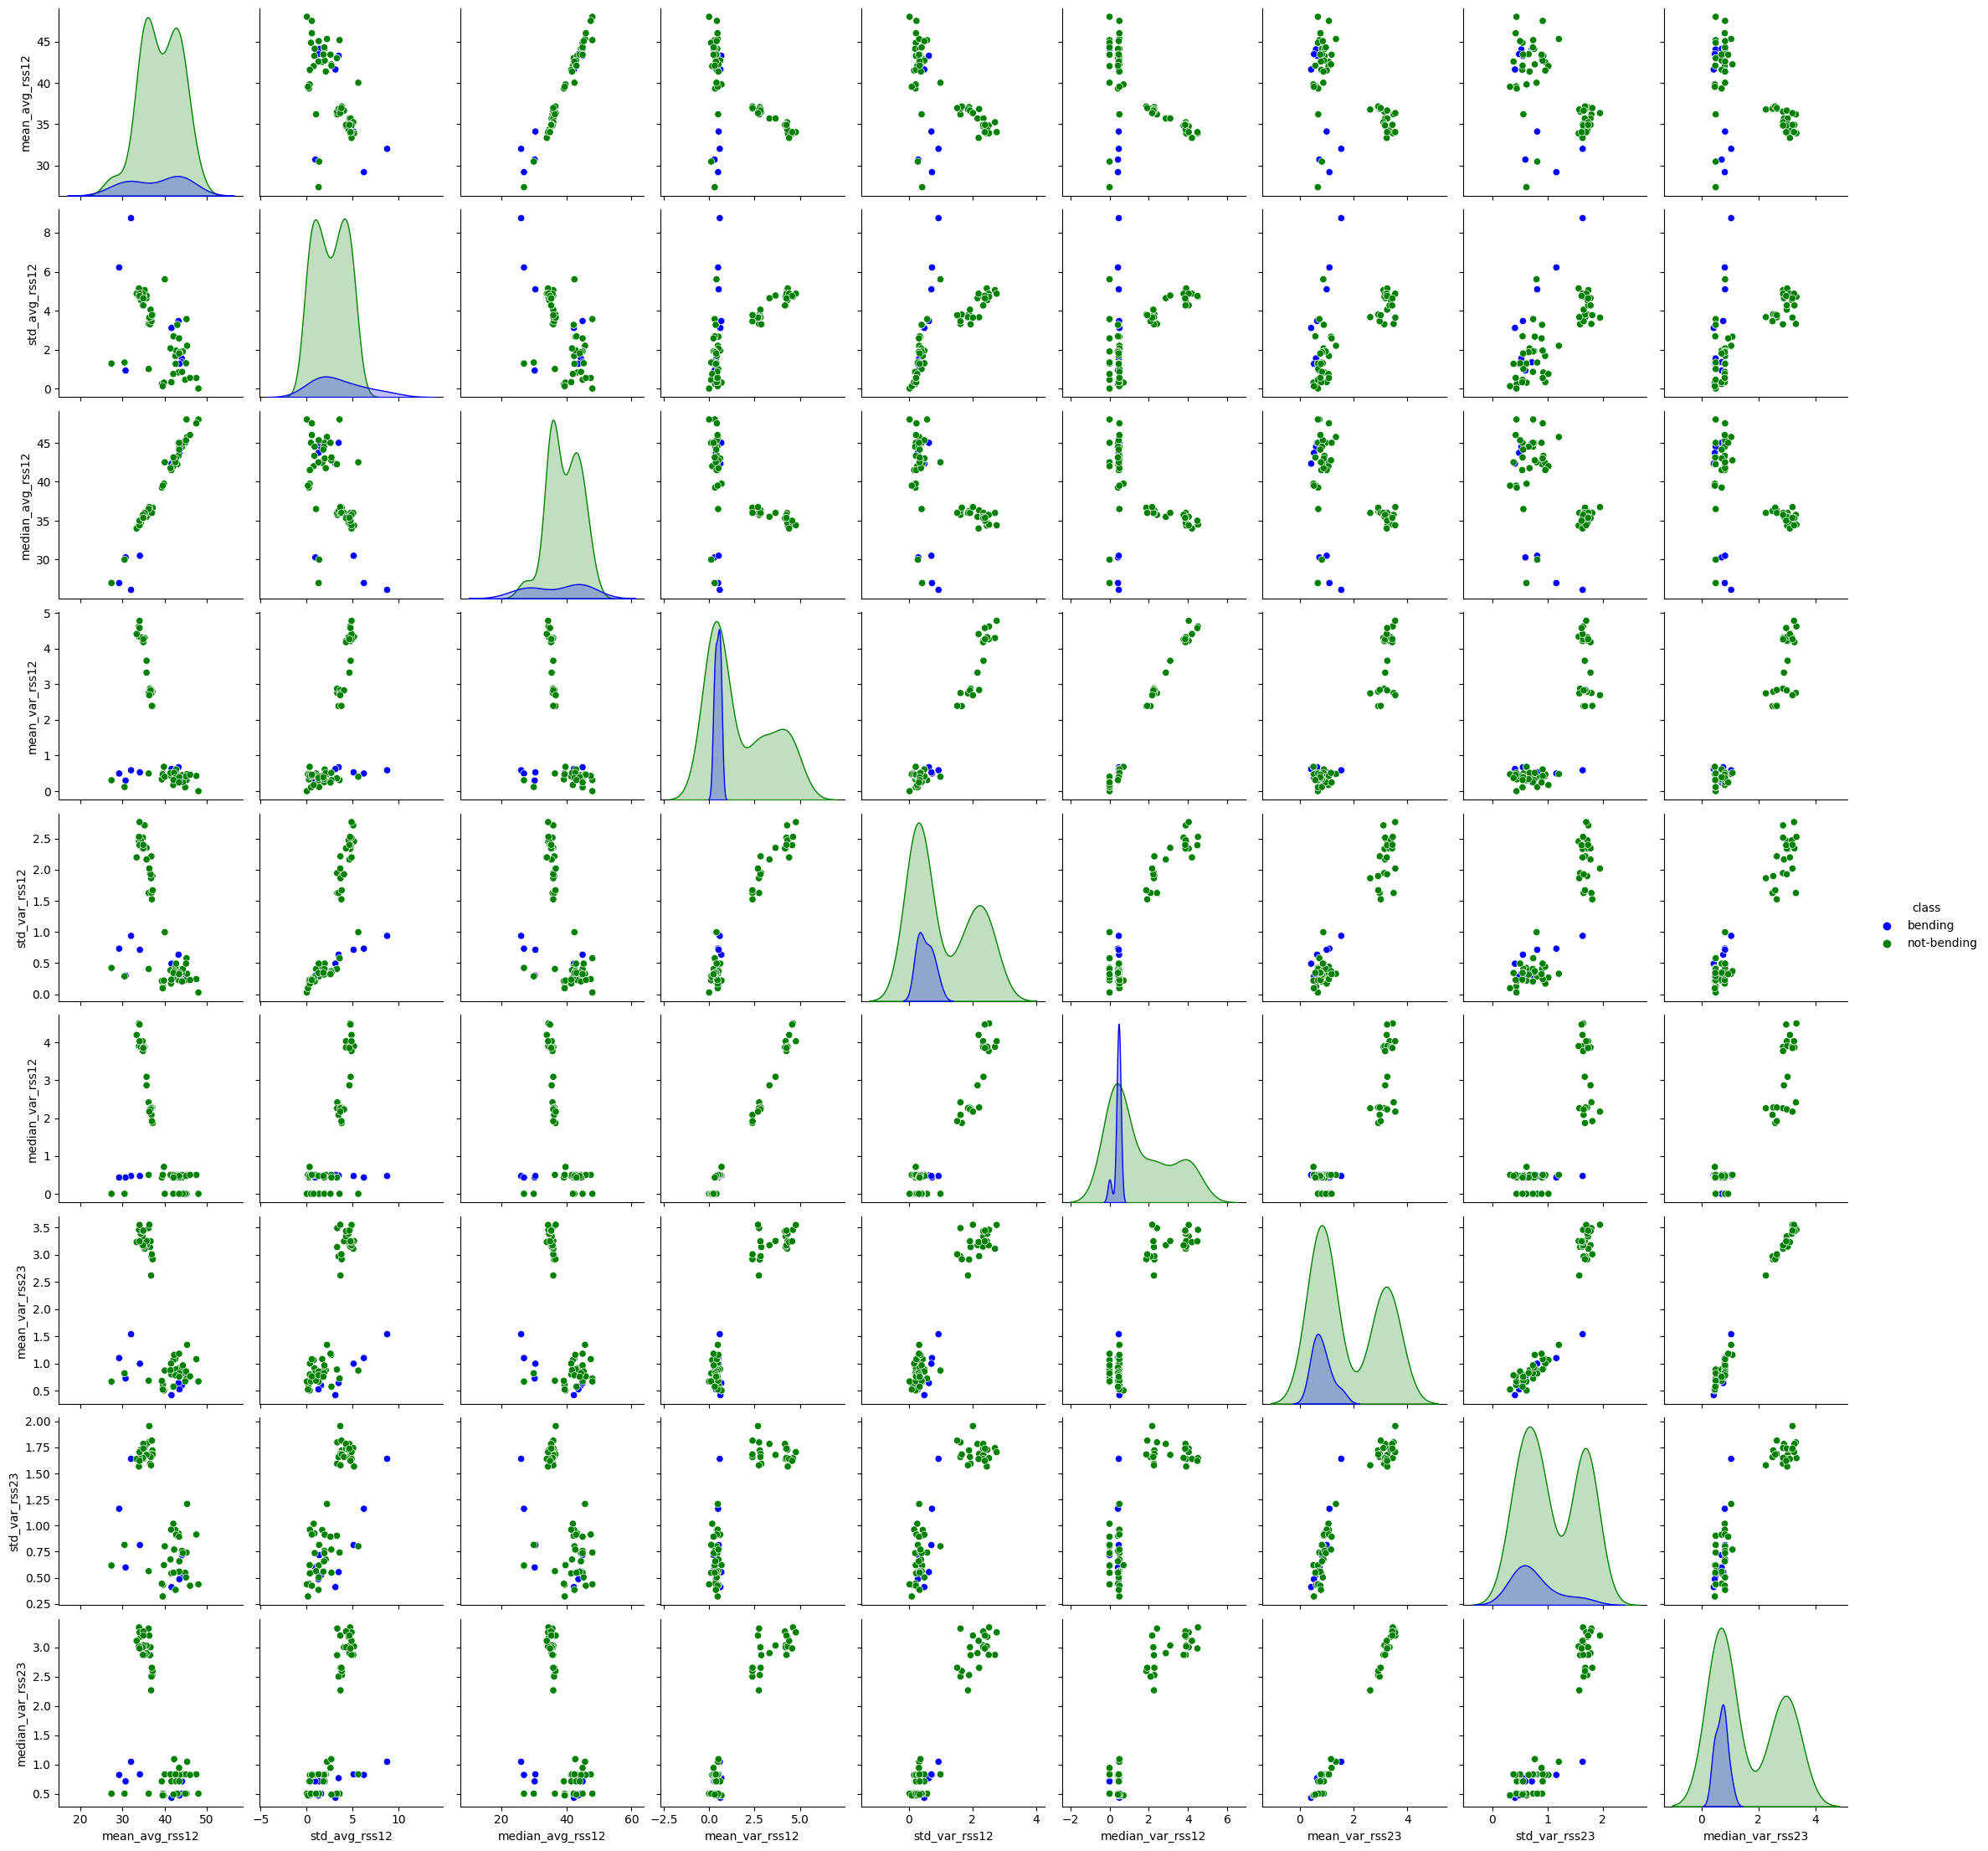

In [13]:
sns.pairplot(data=new_training_df1, hue='class', palette={'bending':'blue', 'not-bending':'green'})

After breaking each time series into 2, the scatterplot of blue (bending) and green (not-bending) becomes more seperable 

<b> Q.4 (a) (iii) Break each time series in your training set into
l
∈ {
1
,
2
, . . . ,
20
}
time series
of approximately equal length and use logistic regression
to solve the binary
classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of
l
and refit a logistic regression model using your pruned set of features.
Alternatively, you can use backward selection using sklearn.feature
selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(
l, p
), where
p
is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation in this problem.
Obviously, use the right way! Also, you may encounter the
problem of class imbalance, which may make some of your folds not having
any instances of the rare class. In such a case, you can use
stratifiedcross
validation.
Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive
Feature Elimination, which is a backward selection algorithm, to logistic re-
gression</b>

In [14]:
## Reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]

final_output = []
train_data_for_all_l = {}
## trying out all possible l
for curr_l in range(1,21):
    lr_training_data  = []
    lr_training_cols = []
    for x in considered_fts:
        for y in best_time_domain_fts:
            for k in range(1, curr_l+1):
                lr_training_cols.append(y + "_" + x + "___split" + str(k))

    lr_training_cols.append("class")
    for instance in train_data:
        path_loc = instance.split("/")
        this_class = path_loc[3]

        this_data = train_data[instance]
        this_row1 = []
        for f in considered_fts:
            arr = this_data[f]
            arr = np.array_split(arr,curr_l)
            for btdf in best_time_domain_fts:
                for ls in range(1,curr_l+1):
                    ftss = extract_ft_value(arr[ls-1], btdf)
                    this_row1.append(ftss)
                    
        if this_class in bending_classes:
            this_row1.append(1)
        else:
            this_row1.append(0)
        lr_training_data.append(this_row1)
        
    lr_training_df = pd.DataFrame(data=lr_training_data, columns = lr_training_cols)
    ## at this point lr_training_df is ready to be used for this l
    ## starting logistic regression part
    acc_of_all_models = []
    auc_of_all_models = []
    fold_fts_of_all_models = []
    startified_kfold = StratifiedKFold(n_splits = 5, shuffle = False)  ## to get equal proportion of bending and not-bending in all the folds
    
    
    for train_indx, val_indx in startified_kfold.split(lr_training_df[lr_training_cols[:-1]], lr_training_df['class']):
        ## Training Data
        lrTrainingX = []  ## <- This is Training X
        lrTrainingY = []  ## <- This is Training Y
        temp = []  ## <- This is Training Data (All columns of Training X and Training Y)
        
        for indices in train_indx:
            temp.append(lr_training_df[lr_training_cols].iloc[indices])
        temp = pd.DataFrame(temp)
        lrTrainingY = temp['class']
        lrTrainingX = temp.drop('class', axis = 1)
        
        ## Validation Data
        lrValidationX = []  ## <- This is Cross Validation X
        lrValidationY = []  ## <- This is Cross Validation Y
        temp2 = []  ## <- This is Cross Validation Data (All columns of Cross Validation X and Cross Validation Y)
        
        for indices in val_indx:
            temp2.append(lr_training_df[lr_training_cols].iloc[indices])
        temp2 = pd.DataFrame(temp2)
        
        lrValidationY = temp2['class']
        lrValidationX = temp2.drop('class', axis = 1)
        
        ## Finding best predictors
        lr_model_temp = LogisticRegression(solver = 'liblinear', C=sys.maxsize)
        ft_selection_model = RFECV(estimator = lr_model_temp, cv=StratifiedKFold(5))
        ft_selection_model.fit(lrTrainingX, lrTrainingY)
        rank_temp = ft_selection_model.ranking_
        
        best_features = []
        
        for z in range(len(lr_training_cols[:-1])):
            if rank_temp[z] == 1:
                best_features.append(lr_training_cols[z])

        ## chaning the dataset to hold columns of new predictors
        newlrTrainingX = lrTrainingX.loc[:,best_features]
        newValidationX = lrValidationX.loc[:,best_features]
        
        ## now here we know the best features
        ## making the final logistic regression model
        lr_model_final = LogisticRegression(solver = 'liblinear', C=sys.maxsize)
        lr_model_final = lr_model_final.fit(newlrTrainingX, lrTrainingY)
        
        ## acc on cross validation 
        validation_accuracy = lr_model_final.score(newValidationX, lrValidationY)
        validation_pred_y_prob = lr_model_final.predict_proba(newValidationX)[::,1]
        validation_auc = roc_auc_score(lrValidationY, validation_pred_y_prob)
        acc_of_all_models.append(validation_accuracy)
        auc_of_all_models.append(validation_auc)
        fold_fts_of_all_models.append(best_features)
    
    best_k_fold_indx = np.argmax(auc_of_all_models)
    this_new_op = []
    this_new_op.append(curr_l)
    this_new_op.append(np.mean(acc_of_all_models))
    this_new_op.append(np.mean(auc_of_all_models))
    this_new_op.append(fold_fts_of_all_models[best_k_fold_indx])
    
    final_output.append(this_new_op)
    
    train_data_for_all_l[curr_l] = lr_training_df
    
final_op_columns = ["L", "CV Accuracy", "CV AUC", "Best Features"]
final_op_df = pd.DataFrame(data=final_output, columns = final_op_columns)
display(final_op_df)
    

,L,CV Accuracy,CV AUC,Best Features
0,1,0.941758,0.983333,"[mean_avg_rss12___split1, mean_avg_rss13___spl..."
1,2,0.898901,0.975000,"[median_avg_rss12___split1, std_avg_rss13___sp..."
2,3,0.928571,0.983333,"[median_avg_rss12___split3, std_avg_rss13___sp..."
3,4,0.900000,0.975000,"[median_avg_rss12___split3, mean_avg_rss23___s..."
4,5,0.942857,0.950000,"[std_avg_rss12___split3, median_avg_rss12___sp..."
5,6,0.900000,0.916667,"[std_avg_rss12___split4, median_avg_rss12___sp..."
6,7,0.900000,0.933333,"[std_avg_rss12___split3, median_avg_rss12___sp..."
7,8,0.928571,0.983333,"[std_avg_rss12___split5, median_avg_rss12___sp..."
8,9,0.942857,1.000000,"[median_avg_rss12___split7, mean_avg_rss23___s..."
9,10,0.942857,0.866667,"[mean_avg_rss12___split4, mean_avg_rss12___spl..."


In [15]:
bst_auc = 0
bst_l = -1
bst_ftss = []
bst_acc = -1
for indx, row in final_op_df.iterrows():
    if row['CV AUC'] > bst_auc:
        bst_auc = row['CV AUC']
        bst_l = row['L']
        bst_ftss = row['Best Features']
        bst_acc = row['CV Accuracy']
        
print("Best L -->", bst_l)
print("Best AUC -->", bst_auc)
print("Best Features(p) -->", bst_ftss)
print("Best Score -->", bst_acc)

Best L --> 9
Best AUC --> 1.0
Best Features(p) --> ['median_avg_rss12___split7', 'mean_avg_rss23___split3']
Best Score --> 0.9428571428571428


<b> There are two ways of doing this problem
    <br>
Approach 1 (Wrong Way) (Not Implemented): Find Out Best Features and use the same best features for every fold which does not sound reasonable as best features for every fold may change
    <br>
Approach 2 (Right Way) (Implemented): Find out Best Features for every cross validation fit to get more accurate results, considering the current data and not the entire train data </b>

<b> Q.4(a) (iv) Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression
β
i
’s as well
as the p-values associated with them</b>

In [16]:
bst_l_train_x = train_data_for_all_l[bst_l][bst_ftss]
bst_l_train_y = train_data_for_all_l[bst_l]['class']

bst_l_lr_model = LogisticRegression(solver='liblinear', C=sys.maxsize)
bst_l_lr_model = bst_l_lr_model.fit(bst_l_train_x, bst_l_train_y)

bst_l_coeff = bst_l_lr_model.coef_[0]
bbb, ppp = chi2(bst_l_train_x, bst_l_train_y)

new_tmp = []

for x in range(len(bst_ftss)):
    ck = []
    ck.append(bst_ftss[x])
    ck.append(bst_l_coeff[x])
    ck.append(ppp[x])
    new_tmp.append(ck)
new_cols = ["Feature Name", "Coeff", "P values"]

new_temp_df = pd.DataFrame(data=new_tmp, columns=new_cols)
display(new_temp_df)

,Feature Name,Coeff,P values
0,median_avg_rss12___split7,-8.011966,2.054477e-01
1,mean_avg_rss23___split3,17.229712,3.241774e-14


Confusion Matrix is ==> 


,,predicted bending,predicted not-bending
0,actual bending,9,0
1,actual not-bending,0,60


*******************************************

Train Accuracy ==>  1.0
*******************************************

Train AUC ==>  1.0
*******************************************

ROC Curve ==> 


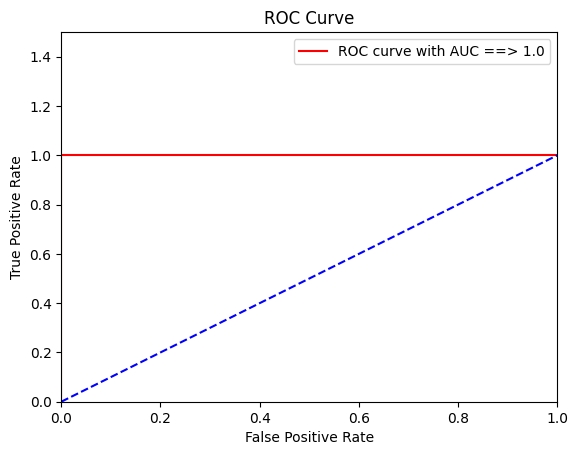

*******************************************



In [17]:
bst_pred_y = bst_l_lr_model.predict(bst_l_train_x)

lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(bst_l_train_y, bst_pred_y).ravel()

r = []
r.append(["actual bending",lr_tp,lr_fn])
r.append(["actual not-bending",lr_fp,lr_tn])
r_c = ["","predicted bending", "predicted not-bending"]

r_df = pd.DataFrame(data=r, columns = r_c)
print("Confusion Matrix is ==> ")
display(r_df)
print("*******************************************\n")

lr_train_score = bst_l_lr_model.score(bst_l_train_x, bst_l_train_y)
print("Train Accuracy ==> ", lr_train_score)
l1_normal_train_accuracy_ = lr_train_score  ## <- use this is 4(b)(ii) comparison
print("*******************************************\n")

lr_pred_y_prob = bst_l_lr_model.predict_proba(bst_l_train_x)[::,1]
lr_train_auc = roc_auc_score(bst_l_train_y, lr_pred_y_prob)
l1_normal_train_auc_ = lr_train_auc  ## <- use this is 4(b)(ii) comparison
print("Train AUC ==> ", lr_train_auc)
print("*******************************************\n")

print("ROC Curve ==> ")
lr_fpr, lr_tpr, kkk = roc_curve(bst_l_train_y, lr_pred_y_prob)
plt.plot(lr_fpr, lr_tpr, color='red', label = "ROC curve with AUC ==> "+ str(lr_train_auc))
plt.plot([0,1],[0,1], color='blue', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()
print("*******************************************\n")

<b> Q.4 (a) (v) Test the classifier on the test set. Remember to break the time series in
your test set into the same number of time series into which you broke your
training set. Remember that the classifier has to be tested using the features
extracted from the test set. Compare the accuracy on the test set with the
cross-validation accuracy you obtained previously.</b>

In [18]:
## preparing the testing data
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]

lr_test_data  = []
lr_test_cols = []
for x in considered_fts:
    for y in best_time_domain_fts:
        for k in range(1, bst_l+1):
            lr_test_cols.append(y + "_" + x + "___split" + str(k))

lr_test_cols.append("class")

for instance in test_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]

    this_data = test_data[instance]
    this_row1 = []
    for f in considered_fts:
        arr = this_data[f]
        arr = np.array_split(arr,bst_l)
        for btdf in best_time_domain_fts:
            for ls in range(1,bst_l+1):
                ftss = extract_ft_value(arr[ls-1], btdf)
                this_row1.append(ftss)

    if this_class in bending_classes:
        this_row1.append(1)
    else:
        this_row1.append(0)
    lr_test_data.append(this_row1)

lr_test_df = pd.DataFrame(data=lr_test_data, columns = lr_test_cols)

lr_test_x = lr_test_df[bst_ftss]
lr_test_y = lr_test_df['class']
lr_test_acc = bst_l_lr_model.score(lr_test_x, lr_test_y)
print("Test Accuracy ==> ",lr_test_acc)
print("Cross Validation Accuracy ==>", bst_acc)

Test Accuracy ==>  0.8947368421052632
Cross Validation Accuracy ==> 0.9428571428571428


In [19]:
print("Almost 89.5% Accuracy on the test set suggest model is not overfit nor underfit, it fits the data well")

Almost 89.5% Accuracy on the test set suggest model is not overfit nor underfit, it fits the data well


<b> Q.4(a) (vi) Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?</b>

The classes are not well seperated
So while using Cross Validation there can be problems where minority class is not included in some fold.
To encounter this we use Startified K-fold which keeps the proportion of all the classes same in all the folds are the original dataset proportion.
So Startified K-fold reduces the instability in calculatig the logistic regression parameters

<b> Q.4 (a) (vii) From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model.</b>

Confusion Matrix for Test Data


,,predicted bending,predicted not-bending
0,actual bending,4,0
1,actual not-bending,2,13


*******************************************

Test Accuracy ==>  0.8947368421052632
*******************************************

Test AUC ==>  1.0
*******************************************

ROC Curve ==> 


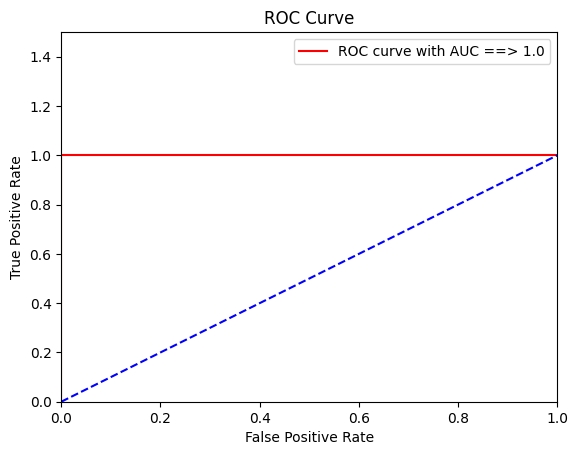

*******************************************



In [20]:
lr_preds_y = bst_l_lr_model.predict(lr_test_x)

lr_tn1, lr_fp1, lr_fn1, lr_tp1 = confusion_matrix(lr_test_y, lr_preds_y).ravel()

r = []
r.append(["actual bending",lr_tp1,lr_fn1])
r.append(["actual not-bending",lr_fp1,lr_tn1])
r_c = ["","predicted bending", "predicted not-bending"]

r_df1 = pd.DataFrame(data=r, columns = r_c)
print("Confusion Matrix for Test Data")
display(r_df1)
print("*******************************************\n")

print("Test Accuracy ==> ",lr_test_acc)
lr_normal_test_accuracy_ = lr_test_acc  ## <- use this is 4(b)(ii) comparison
print("*******************************************\n")

lr_pred_y_prob1 = bst_l_lr_model.predict_proba(lr_test_x)[::,1]
lr_train_auc1 = roc_auc_score(lr_test_y, lr_pred_y_prob1)
lr_normal_test_auc_ = lr_train_auc1  ## <- use this is 4(b)(ii) comparison
print("Test AUC ==> ", lr_train_auc1)
print("*******************************************\n")

print("ROC Curve ==> ")
lr_fpr1, lr_tpr1, kkk1 = roc_curve(lr_test_y, lr_pred_y_prob1)
plt.plot(lr_fpr1, lr_tpr1, color='red', label = "ROC curve with AUC ==> "+ str(lr_train_auc))
plt.plot([0,1],[0,1], color='blue', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()
print("*******************************************\n")

Yes the above confusion matrix shows that the classes are imbalanced. "bending" class has 4 samples while "not-bending" class has 15 samples

Before Sampling
Bending Count ==> 9
Not-Bending Count ==> 60
********************************



Atfer Sampling
Bending Count ==> 60
Not-Bending Count ==> 60
********************************

Using Sampled Data
********************************

Train Accuracy ==> 1.0
********************************

Confusion Matrix for Test Data


,,predicted bending,predicted not-bending
0,actual bending,60,0
1,actual not-bending,0,60


********************************

Train AUC ==>  1.0
*******************************************

ROC Curve ==> 


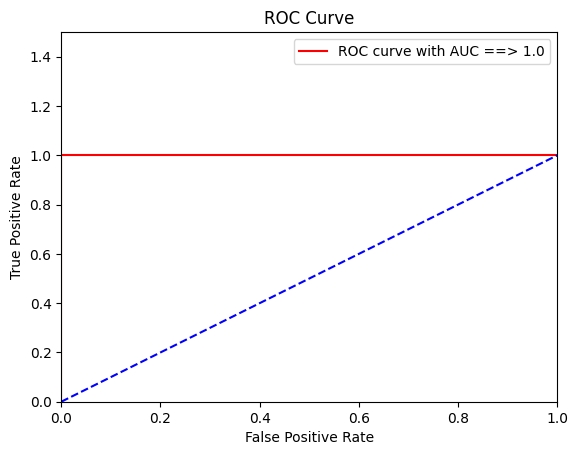

*******************************************



In [21]:
## upsampling the minority class (bending)
TrainX = train_data_for_all_l[bst_l][bst_ftss]
TrainY = train_data_for_all_l[bst_l]['class']

print("Before Sampling")
print("Bending Count ==>", list(TrainY).count(1))
print("Not-Bending Count ==>", list(TrainY).count(0))
print("********************************\n")

sm_sampling = SMOTE(sampling_strategy='all')
sample_TrainX, sample_TrainY = sm_sampling.fit_resample(TrainX, TrainY.ravel())

print("\n")
print("Atfer Sampling")
print("Bending Count ==>", list(sample_TrainY).count(1))
print("Not-Bending Count ==>", list(sample_TrainY).count(0))
print("********************************\n")

## making new logistic regression model
sample_lr_model = LogisticRegression(solver='liblinear', C=sys.maxsize)
smaple_lr_model = sample_lr_model.fit(sample_TrainX, sample_TrainY)

print("Using Sampled Data")
print("********************************\n")

print("Train Accuracy ==>", sample_lr_model.score(sample_TrainX, sample_TrainY))
print("********************************\n")


sample_train_pred = sample_lr_model.predict(sample_TrainX)
sm_tn, sm_fp, sm_fn, sm_tp = confusion_matrix(sample_TrainY, sample_train_pred).ravel()

r = []
r.append(["actual bending",sm_tp,sm_fn])
r.append(["actual not-bending",sm_fp,sm_tn])
r_c = ["","predicted bending", "predicted not-bending"]

r_df2 = pd.DataFrame(data=r, columns = r_c)
print("Confusion Matrix for Test Data")
display(r_df2)
print("********************************\n")

lr_pred_y_prob1 = sample_lr_model.predict_proba(sample_TrainX)[::,1]
lr_train_auc1 = roc_auc_score(sample_TrainY, lr_pred_y_prob1)
print("Train AUC ==> ", lr_train_auc1)
print("*******************************************\n")

print("ROC Curve ==> ")
lr_fpr1, lr_tpr1, kkk1 = roc_curve(sample_TrainY, lr_pred_y_prob1)
plt.plot(lr_fpr1, lr_tpr1, color='red', label = "ROC curve with AUC ==> "+ str(lr_train_auc))
plt.plot([0,1],[0,1], color='blue', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()
print("*******************************************\n")


Test Accuracy ==> 0.8947368421052632
********************************

Confusion Matrix for Test Data


,,predicted bending,predicted not-bending
0,actual bending,4,0
1,actual not-bending,2,13


********************************

Test AUC ==>  1.0
*******************************************

ROC Curve ==> 


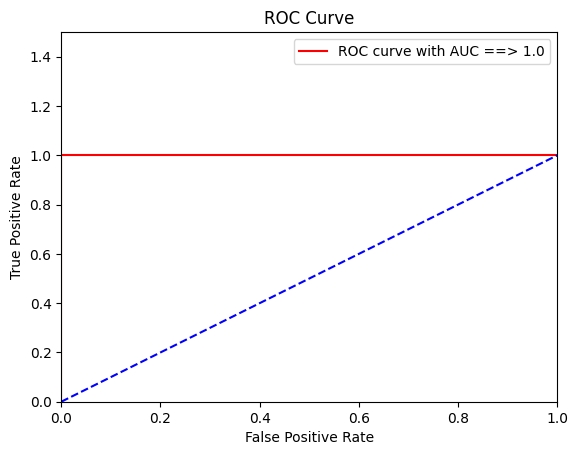

*******************************************



In [22]:
print("Test Accuracy ==>", sample_lr_model.score(lr_test_x, lr_test_y))
print("********************************\n")


sample_train_pred = sample_lr_model.predict(lr_test_x)
sm_tn, sm_fp, sm_fn, sm_tp = confusion_matrix(lr_test_y, sample_train_pred).ravel()

r = []
r.append(["actual bending",sm_tp,sm_fn])
r.append(["actual not-bending",sm_fp,sm_tn])
r_c = ["","predicted bending", "predicted not-bending"]

r_df2 = pd.DataFrame(data=r, columns = r_c)
print("Confusion Matrix for Test Data")
display(r_df2)
print("********************************\n")

lr_pred_y_prob1 = sample_lr_model.predict_proba(lr_test_x)[::,1]
lr_train_auc1 = roc_auc_score(lr_test_y, lr_pred_y_prob1)
print("Test AUC ==> ", lr_train_auc1)
print("*******************************************\n")

print("ROC Curve ==> ")
lr_fpr1, lr_tpr1, kkk1 = roc_curve(lr_test_y, lr_pred_y_prob1)
plt.plot(lr_fpr1, lr_tpr1, color='red', label = "ROC curve with AUC ==> "+ str(lr_train_auc))
plt.plot([0,1],[0,1], color='blue', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()
print("*******************************************\n")

<b> Q.4 (b) Binary Classification Using
L
1
-penalized logistic regression</b>

<b> Q4. (b) (i) Repeat 4(a)iii using L 1 -penalized logistic regression,  i.e. instead of using p- values for variable selection, use L 1 regularization. Note that in this problem, you have to cross-validate for both l , the number of time series into which you break each of your instances, and λ , the weight of L 1 penalty in your logistic regression objective function (or C , the budget). Packages usually perform cross-validation for λ automatically</b>

In [23]:
## Reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]

final_output_penalized = []
train_data_for_all_l_penalized = {}
penalized_lambda_l = {}
## trying out all possible l
for curr_l in range(1,21):
    lr_training_data  = []
    lr_training_cols = []
    for x in considered_fts:
        for y in best_time_domain_fts:
            for k in range(1, curr_l+1):
                lr_training_cols.append(y + "_" + x + "___split" + str(k))

    lr_training_cols.append("class")
    
    for instance in train_data:
        path_loc = instance.split("/")
        this_class = path_loc[3]

        this_data = train_data[instance]
        this_row1 = []
        for f in considered_fts:
            arr = this_data[f]
            arr = np.array_split(arr,curr_l)
            for btdf in best_time_domain_fts:
                for ls in range(1,curr_l+1):
                    ftss = extract_ft_value(arr[ls-1], btdf)
                    this_row1.append(ftss)
                    
        if this_class in bending_classes:
            this_row1.append(1)
        else:
            this_row1.append(0)
        lr_training_data.append(this_row1)
        
    lr_training_df = pd.DataFrame(data=lr_training_data, columns = lr_training_cols)
    
    normalization = MinMaxScaler()
    normalization1 = normalization.fit_transform(lr_training_df.values)
    lr_training_df = pd.DataFrame(normalization1, columns = lr_training_df.columns)
    ## at this point lr_training_df is ready to be used for this l
    ## starting logistic regression part
    acc_of_all_models = []
    auc_of_all_models = []
    lambda_of_all_models = []
    fold_fts_of_all_models = []
    startified_kfold = StratifiedKFold(n_splits = 5, shuffle = False)  ## to get equal proportion of bending and not-bending in all the folds
    for train_indx, val_indx in startified_kfold.split(lr_training_df[lr_training_cols[:-1]], lr_training_df['class']):
        ## Training Data
        lrTrainingX = []  ## <- This is Training X
        lrTrainingY = []  ## <- This is Training Y
        temp = []  ## <- This is Training Data (All columns of Training X and Training Y)
        
        for indices in train_indx:
            temp.append(lr_training_df[lr_training_cols].iloc[indices])
        temp = pd.DataFrame(temp)
        lrTrainingY = temp['class']
        lrTrainingX = temp.drop('class', axis = 1)
        
        ## Validation Data
        lrValidationX = []  ## <- This is Cross Validation X
        lrValidationY = []  ## <- This is Cross Validation Y
        temp2 = []  ## <- This is Cross Validation Data (All columns of Cross Validation X and Cross Validation Y)
        
        for indices in val_indx:
            temp2.append(lr_training_df[lr_training_cols].iloc[indices])
        temp2 = pd.DataFrame(temp2)
        
        lrValidationY = temp2['class']
        lrValidationX = temp2.drop('class', axis = 1)
        

        ## now here we know the best features
        ## making the final logistic regression model
        lr_model_final = LogisticRegressionCV(cv=5,solver = 'liblinear', penalty='l1', max_iter = 1000)
        lr_model_final = lr_model_final.fit(lrTrainingX, lrTrainingY)
        
        penalty = lr_model_final.C_[0]
        lambda_val = 1/penalty
        ## acc on cross validation 
        validation_accuracy = lr_model_final.score(lrValidationX, lrValidationY)
        validation_pred_y_prob = lr_model_final.predict_proba(lrValidationX)[::,1]
        validation_auc = roc_auc_score(lrValidationY, validation_pred_y_prob)
        acc_of_all_models.append(validation_accuracy)
        auc_of_all_models.append(validation_auc)
        fold_fts_of_all_models.append(best_features)
        lambda_of_all_models.append(lambda_val)
    
    best_k_fold_indx = np.argmax(auc_of_all_models)
    this_new_op = []
    this_new_op.append(curr_l)
    this_new_op.append(np.mean(acc_of_all_models))
    this_new_op.append(np.mean(auc_of_all_models))
    
    penalized_lambda_l[curr_l] = lambda_of_all_models[best_k_fold_indx]
    
    final_output_penalized.append(this_new_op)
    
    train_data_for_all_l_penalized[curr_l] = lr_training_df
    
final_op_columns = ["L", "Accuracy", "AUC"]
final_op_df_penalized = pd.DataFrame(data=final_output_penalized, columns = final_op_columns)
display(final_op_df_penalized)
    

,L,Accuracy,AUC
0,1,0.870330,0.950000
1,2,0.942857,0.916667
2,3,0.914286,0.975000
3,4,0.942857,0.991667
4,5,0.913187,0.958333
5,6,0.914286,0.941667
6,7,0.941758,0.991667
7,8,0.913187,0.950000
8,9,0.898901,0.925000
9,10,0.942857,0.958333


In [24]:
bst_auc_penalized = 0
bst_l_penalized = -1
bst_acc_penalized = -1
for indx, row in final_op_df_penalized.iterrows():
    if row['AUC'] > bst_auc_penalized:
        bst_auc_penalized = row['AUC']
        bst_l_penalized = row['L']
        bst_acc_penalized = row['Accuracy']
        
print("Best L (L1 Regression)-->", bst_l_penalized)
print("Best AUC(L1 Regression)-->", bst_auc_penalized)
print("Best Score(L1 Regression) -->", bst_acc_penalized)
print("Best Lambda(L1 Regression) -->", penalized_lambda_l[bst_l_penalized])

Best L (L1 Regression)--> 4.0
Best AUC(L1 Regression)--> 0.9916666666666668
Best Score(L1 Regression) --> 0.9428571428571428
Best Lambda(L1 Regression) --> 0.3593813663804626


<b> <b> Q.4 (b) (ii) Compare the
L
1
-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?</b></b>

Confusion Matrix is ==> 


,,predicted bending,predicted not-bending
0,actual bending,9,0
1,actual not-bending,0,60


*******************************************

Train Accuracy ==>  1.0
*******************************************

Train AUC ==>  1.0
*******************************************

ROC Curve ==> 


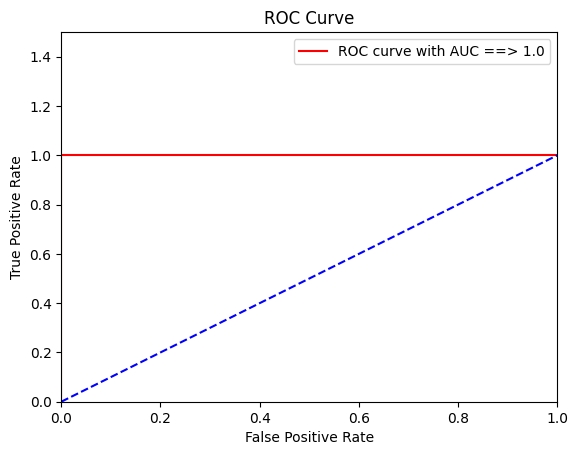

*******************************************



In [25]:

bst_l_train_y = train_data_for_all_l_penalized[bst_l_penalized]['class']
bst_l_train_x = train_data_for_all_l_penalized[bst_l_penalized]
bst_l_train_x = bst_l_train_x.drop('class', axis = 1)

bst_c_value = 1/penalized_lambda_l[bst_l_penalized]

lasso_model = LogisticRegression(solver = 'liblinear', penalty='l1', C=bst_c_value)
lasso_model = lasso_model.fit(bst_l_train_x, bst_l_train_y)

bst_pred_y = lasso_model.predict(bst_l_train_x)

lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(bst_l_train_y, bst_pred_y).ravel()

r = []
r.append(["actual bending",lr_tp,lr_fn])
r.append(["actual not-bending",lr_fp,lr_tn])
r_c = ["","predicted bending", "predicted not-bending"]

r_df = pd.DataFrame(data=r, columns = r_c)
print("Confusion Matrix is ==> ")
display(r_df)
print("*******************************************\n")

lr_train_score = lasso_model.score(bst_l_train_x, bst_l_train_y)
print("Train Accuracy ==> ", lr_train_score)
l1_final_train_accuracy_ = lr_train_score  ## <- use this is 4(b)(ii) comparison
print("*******************************************\n")

lr_pred_y_prob = lasso_model.predict_proba(bst_l_train_x)[::,1]
lr_train_auc = roc_auc_score(bst_l_train_y, lr_pred_y_prob)
l1_final_train_auc_ = lr_train_auc ## <- use this is 4(b)(ii) comparison
print("Train AUC ==> ", lr_train_auc)
print("*******************************************\n")

print("ROC Curve ==> ")
lr_fpr, lr_tpr, kkk = roc_curve(bst_l_train_y, lr_pred_y_prob)
plt.plot(lr_fpr, lr_tpr, color='red', label = "ROC curve with AUC ==> "+ str(lr_train_auc))
plt.plot([0,1],[0,1], color='blue', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()
print("*******************************************\n")

In [26]:
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]

lr_test_data  = []
lr_test_cols = []
for x in considered_fts:
    for y in best_time_domain_fts:
        for k in range(1, int(bst_l_penalized)+1):
            lr_test_cols.append(y + "_" + x + "___split" + str(k))

lr_test_cols.append("class")

for instance in test_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]

    this_data = test_data[instance]
    this_row1 = []
    for f in considered_fts:
        arr = this_data[f]
        arr = np.array_split(arr,bst_l_penalized)
        for btdf in best_time_domain_fts:
            for ls in range(1,int(bst_l_penalized)+1):
                ftss = extract_ft_value(arr[ls-1], btdf)
                this_row1.append(ftss)

    if this_class in bending_classes:
        this_row1.append(1)
    else:
        this_row1.append(0)
    lr_test_data.append(this_row1)

lr_test_df = pd.DataFrame(data=lr_test_data, columns = lr_test_cols)
normalize = MinMaxScaler()
normalize1 = normalize.fit_transform(lr_test_df.values)
lr_test_df = pd.DataFrame(normalize1, columns = lr_test_df.columns)

lr_test_y = lr_test_df['class']
lr_test_x = lr_test_df.drop('class', axis = 1)


LogisticRegression(C=2.782559402207126, penalty='l1', solver='liblinear')
Confusion Matrix for Test Data


,,predicted bending,predicted not-bending
0,actual bending,3,1
1,actual not-bending,0,15


*******************************************

Test Accuracy ==>  0.9473684210526315
*******************************************

Test AUC ==>  0.9833333333333334
*******************************************

ROC Curve ==> 


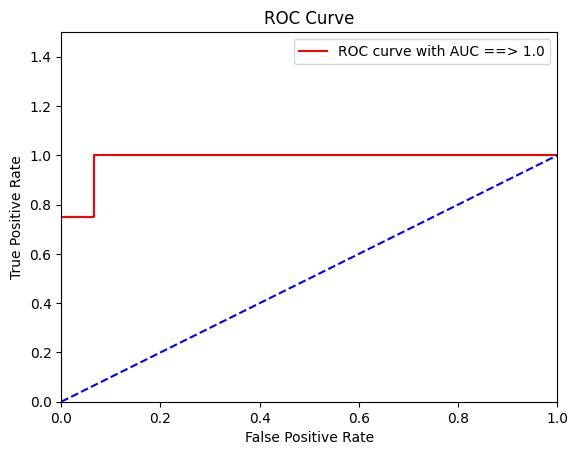

*******************************************



In [27]:
print(lasso_model)
lr_preds_y = lasso_model.predict(lr_test_x)

lr_tn1, lr_fp1, lr_fn1, lr_tp1 = confusion_matrix(lr_test_y, lr_preds_y).ravel()

r = []
r.append(["actual bending",lr_tp1,lr_fn1])
r.append(["actual not-bending",lr_fp1,lr_tn1])
r_c = ["","predicted bending", "predicted not-bending"]

r_df1 = pd.DataFrame(data=r, columns = r_c)
print("Confusion Matrix for Test Data")
display(r_df1)
print("*******************************************\n")

lr_test_score = lasso_model.score(lr_test_x, lr_test_y)
print("Test Accuracy ==> ", lr_test_score)
l1_final_test_accuracy_ = lr_test_score  ## <- use this is 4(b)(ii) comparison
print("*******************************************\n")

lr_pred_y_prob1 = lasso_model.predict_proba(lr_test_x)[::,1]
lr_test_auc1 = roc_auc_score(lr_test_y, lr_pred_y_prob1)
print("Test AUC ==> ", lr_test_auc1)
l1_final_test_auc_ = lr_test_auc1  ## <- use this is 4(b)(ii) comparison
print("*******************************************\n")

print("ROC Curve ==> ")
lr_fpr1, lr_tpr1, kkk1 = roc_curve(lr_test_y, lr_pred_y_prob1)
plt.plot(lr_fpr1, lr_tpr1, color='red', label = "ROC curve with AUC ==> "+ str(lr_train_auc))
plt.plot([0,1],[0,1], color='blue', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.xlim([0,1])
plt.ylim([0,1.5])
plt.legend()
plt.show()
print("*******************************************\n")

In [28]:
## train_auc, train_acc, test_auc, test_acc
compare_data_cols = ["parameter", "Logistic Regression", "L1 Penalized Logistic Regression"]
compare_data = []
compare_data.append(["Train AUC", l1_normal_train_auc_ , l1_final_train_auc_])
compare_data.append(["Train Accuracy", l1_normal_train_accuracy_ , l1_final_train_accuracy_])
compare_data.append(["Test AUC", lr_normal_test_auc_, l1_final_test_auc_])
compare_data.append(["Test Accuracy", lr_normal_test_accuracy_, l1_final_test_accuracy_])

comparison_results = pd.DataFrame(data = compare_data, columns = compare_data_cols)
display(comparison_results)

,parameter,Logistic Regression,L1 Penalized Logistic Regression
0,Train AUC,1.000000,1.000000
1,Train Accuracy,1.000000,1.000000
2,Test AUC,1.000000,0.983333
3,Test Accuracy,0.894737,0.947368


In [29]:
print("After Comparing all the above measure, L1 Penalized Logistic Regression performs better because of higher test accuracy")

After Comparing all the above measure, L1 Penalized Logistic Regression performs better because of higher test accuracy


In [30]:
print("L1 Penalized Logistic Regression is easier to implement because feature selection is done automatically using the L1 regularizer")

L1 Penalized Logistic Regression is easier to implement because feature selection is done automatically using the L1 regularizer


<b> Q.4 (c) Multi-class Classification (The Realistic Case)</b>

<b> Q.4 (c) (i) Find the best l in the same way as you found it in 2(b)i to build an L 1 - penalized multinomial regression model to classify all activities in your train- ing set. 10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible</b>

In [31]:
import warnings
warnings.filterwarnings("ignore")
## Reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
final_output_penalized = []
train_data_for_multi_l = {}
penalized_penalty_l = {}
## trying out all possible l
for curr_l in range(1,21):
    lr_training_data  = []
    lr_training_cols = []
    for x in considered_fts:
        for y in best_time_domain_fts:
            for k in range(1, curr_l+1):
                lr_training_cols.append(y + "_" + x + "___split" + str(k))

    lr_training_cols.append("class")
    
    for instance in train_data:
        path_loc = instance.split("/")
        this_class = path_loc[3]

        this_data = train_data[instance]
        this_row1 = []
        for f in considered_fts:
            arr = this_data[f]
            arr = np.array_split(arr,curr_l)
            for btdf in best_time_domain_fts:
                for ls in range(1,curr_l+1):
                    ftss = extract_ft_value(arr[ls-1], btdf)
                    this_row1.append(ftss)
                    
        this_row1.append(all_classes.index(this_class))
        lr_training_data.append(this_row1)
        
    lr_training_df = pd.DataFrame(data=lr_training_data, columns = lr_training_cols)
    
    normalization = MinMaxScaler()
    normalization1 = normalization.fit_transform(lr_training_df[lr_training_cols[:-1]].values)
    normalized_df = pd.DataFrame(normalization1, columns = lr_training_cols[:-1])
    lr_training_df = normalized_df.join(lr_training_df["class"])
    ## at this point lr_training_df is ready to be used for this l
    ## starting logistic regression part
    acc_of_all_models = []
    penalty_of_all_models = []
    startified_kfold = StratifiedKFold(n_splits = 5, shuffle = False)  ## to get equal proportion of bending and not-bending in all the folds
    for train_indx, val_indx in startified_kfold.split(lr_training_df[lr_training_cols[:-1]], lr_training_df['class']):
        ## Training Data
        lrTrainingX = []  ## <- This is Training X
        lrTrainingY = []  ## <- This is Training Y
        temp = []  ## <- This is Training Data (All columns of Training X and Training Y)
        
        for indices in train_indx:
            temp.append(lr_training_df[lr_training_cols].iloc[indices])
        temp = pd.DataFrame(temp)
        lrTrainingY = temp['class']
        lrTrainingX = temp.drop('class', axis = 1)
        
        ## Validation Data
        lrValidationX = []  ## <- This is Cross Validation X
        lrValidationY = []  ## <- This is Cross Validation Y
        temp2 = []  ## <- This is Cross Validation Data (All columns of Cross Validation X and Cross Validation Y)
        
        for indices in val_indx:
            temp2.append(lr_training_df[lr_training_cols].iloc[indices])
        temp2 = pd.DataFrame(temp2)
        
        lrValidationY = temp2['class']
        lrValidationX = temp2.drop('class', axis = 1)
        

        ## now here we know the best features
        ## making the final logistic regression model
        multi_lr_model = LogisticRegressionCV(cv=5,solver = 'liblinear', penalty='l1', max_iter = 1000, multi_class='auto')
        multi_lr_model = lr_model_final.fit(lrTrainingX, lrTrainingY)
        
        penalty = lr_model_final.C_
        
        ## acc on cross validation 
        validation_accuracy = lr_model_final.score(lrValidationX, lrValidationY)
        acc_of_all_models.append(validation_accuracy)
        penalty_of_all_models.append(penalty)
    
    best_k_fold_indx = np.argmax(acc_of_all_models)
    this_new_op = []
    this_new_op.append(curr_l)
    this_new_op.append(np.mean(acc_of_all_models))
    penalized_penalty_l[curr_l] = penalty_of_all_models[best_k_fold_indx]
    #this_new_op.append(penalized_penalty_l[curr_l])
    final_output_penalized.append(this_new_op)
    
    train_data_for_multi_l[curr_l] = lr_training_df
    
final_op_columns = ["L", "Accuracy"]
final_op_df_penalized = pd.DataFrame(data=final_output_penalized, columns = final_op_columns)
display(final_op_df_penalized)
    

,L,Accuracy
0,1,0.796703
1,2,0.782418
2,3,0.693407
3,4,0.681319
4,5,0.710989
5,6,0.636264
6,7,0.581319
7,8,0.595604
8,9,0.594505
9,10,0.621978


In [32]:
multinomial_max_acc = -1
multinomial_best_l = -1
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

for indx, row in final_op_df_penalized.iterrows():
    if row['Accuracy'] > multinomial_max_acc:
        multinomial_max_acc = row['Accuracy']
        multinomial_best_l = row['L']
        
        
print("Best L for Multinomial regression Model ==> ", multinomial_best_l)
print("Best Accuracy(Cross Validation) for Mulitnomial regression Model ==> ", multinomial_max_acc)


multinomial_best_penalty = penalized_penalty_l[multinomial_best_l]

multi_temp = []
for x in range(len(all_classes)):
    multi_temp.append([all_classes[x], 1/multinomial_best_penalty[x]])
    
multi_temp_cols = ["Class", "Lambda"]
multi_temp = pd.DataFrame(data=multi_temp, columns = multi_temp_cols)
display(multi_temp)

Best L for Multinomial regression Model ==>  1.0
Best Accuracy(Cross Validation) for Mulitnomial regression Model ==>  0.7967032967032968


,Class,Lambda
0,bending1,0.046416
1,bending2,0.000774
2,cycling,0.359381
3,lying,0.000774
4,sitting,0.046416
5,standing,0.046416
6,walking,0.359381


In [33]:
def run_this_model(class_models, X, this_class):
    """
    """
    all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
    preds = []
    predprobs = pd.DataFrame()
    
    for cls in range(len(class_models)):
        pred_class_prob = []
        this_class_model = class_models[cls]
        pred_prob = this_class_model.predict_proba(X)
        
        for it in range(len(pred_prob)):
            pred_class_prob.append(pred_prob[it][1])
        pred_class_prob = pd.DataFrame(pred_class_prob, columns = [all_classes[cls]])
        
        predprobs = pd.concat([predprobs, pred_class_prob], axis = 1)
        
    for it in range(len(predprobs)):
        curr_max = -1
        pred = -1
        
        for y in range(len(all_classes)):
            prob = predprobs[all_classes[y]][it]
            if prob > curr_max:
                curr_max = prob
                pred = all_classes[y]
        preds.append(all_classes.index(pred))
        
    return preds, predprobs
    

In [34]:
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

multinomial_df = train_data_for_multi_l[multinomial_best_l]
multinomialY = multinomial_df['class']
multinomialX = multinomial_df.drop('class', axis = 1)
all_models = []
for cls in range(0, len(all_classes)):
    new_y = []
    bestest_c_val = multinomial_best_penalty[cls]
    for it in range(len(multinomialY)):
        if multinomialY[it] == cls:
            new_y.append(1)
        else:
            new_y.append(0)
            
    l1_multi_model = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = bestest_c_val, multi_class = 'auto')
    l1_multi_model = l1_multi_model.fit(multinomialX, new_y)
    all_models.append(l1_multi_model)
    

train_preds, train_prob = run_this_model(all_models, multinomialX, cls)
correct = 0

for x in range(len(train_preds)):
    if train_preds[x] == multinomialY[x]:
        correct+=1
        
print("Train Accuracy for Multiclass Logistic Regression ==>", correct/len(multinomialY))
final_multiclass_train_acc  = correct/len(multinomialY)

Train Accuracy for Multiclass Logistic Regression ==> 0.9710144927536232


In [35]:
## preparing the testing data
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

lr_multi_test_data  = []
lr_multi_test_cols = []
for x in considered_fts:
    for y in best_time_domain_fts:
        for k in range(1, int(multinomial_best_l)+1):
            lr_multi_test_cols.append(y + "_" + x + "___split" + str(k))

lr_multi_test_cols.append("class")

for instance in test_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]

    this_data = test_data[instance]
    this_row1 = []
    for f in considered_fts:
        arr = this_data[f]
        arr = np.array_split(arr,int(multinomial_best_l))
        for btdf in best_time_domain_fts:
            for ls in range(1,int(multinomial_best_l)+1):
                ftss = extract_ft_value(arr[ls-1], btdf)
                this_row1.append(ftss)

    this_row1.append(all_classes.index(this_class))
    lr_multi_test_data.append(this_row1)

lr_multi_test_df = pd.DataFrame(data=lr_multi_test_data, columns = lr_multi_test_cols)

##normalize the data
normalization = MinMaxScaler()
normalization1 = normalization.fit_transform(lr_multi_test_df[lr_multi_test_cols[:-1]].values)
multi_norm_df = pd.DataFrame(normalization1, columns = lr_multi_test_cols[:-1])
lr_multi_test_df = multi_norm_df.join(lr_multi_test_df['class'])

lr_multi_test_x = lr_multi_test_df[lr_multi_test_cols[:-1]]
lr_multi_test_y = lr_multi_test_df['class']
test_preds, test_prob = run_this_model(all_models, lr_multi_test_x, cls)
correct = 0
for x in range(len(test_preds)):
    if test_preds[x] == lr_multi_test_y[x]:
        correct+=1
        
print("Test Accuracy ==> ",correct/len(lr_multi_test_y))
print("Test Error ==> ", 1 - (correct/len(lr_multi_test_y)))
final_mutliclass_test_acc = correct/len(lr_multi_test_y)

Test Accuracy ==>  0.8947368421052632
Test Error ==>  0.10526315789473684


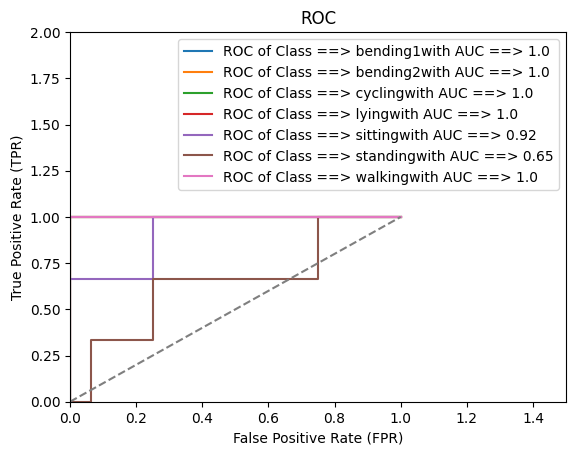

In [36]:
multi_temp_y = []
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

for x in range(0,len(lr_multi_test_y)):
    r = [0 for z in range(7)]
    
    r[lr_multi_test_y[x]] = 1
    multi_temp_y.append(r)
multi_temp_df = pd.DataFrame(data = multi_temp_y, columns=all_classes)
multi_test_prob = test_prob
multi_class_auc = {}
false_pr = {}
true_pr = {}

for x in range(len(all_classes)):
    false_pr[x], true_pr[x], cc = roc_curve(multi_temp_df[all_classes[x]], multi_test_prob[all_classes[x]])
    multi_class_auc[x] = auc(false_pr[x], true_pr[x])
    
for x in range(len(all_classes)):
    plt.plot(false_pr[x], true_pr[x], label = 'ROC of Class ==> ' + all_classes[x] + "with AUC ==> " + str(round(multi_class_auc[x],2)))

plt.plot([0,1],[0,1], linestyle='dashed')
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.title("ROC")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

In [37]:
lr_multi_test_y = [z for z in lr_multi_test_y]
print(lr_multi_test_y)
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

multi_confusion_matrix = confusion_matrix(lr_multi_test_y, test_preds)

temp_cols = [""]
temp_row = []
for x in all_classes:
    temp_cols.append("Predicted_"+x)
    
for x in range(len(all_classes)):
    c = ["Actual_"+all_classes[x]] + list(multi_confusion_matrix[x])
    temp_row.append(c)
    
temp_df = pd.DataFrame(data=temp_row, columns=temp_cols)
display(temp_df)

[0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6]


,,Predicted_bending1,Predicted_bending2,Predicted_cycling,Predicted_lying,Predicted_sitting,Predicted_standing,Predicted_walking
0,Actual_bending1,2,0,0,0,0,0,0
1,Actual_bending2,0,2,0,0,0,0,0
2,Actual_cycling,0,0,3,0,0,0,0
3,Actual_lying,0,0,0,3,0,0,0
4,Actual_sitting,0,0,0,0,3,0,0
5,Actual_standing,0,0,0,0,2,1,0
6,Actual_walking,0,0,0,0,0,0,3


<b> Q.4 (c) (ii) Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.</b>

<b> Gaussian Naive Bayes </b>

In [38]:
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
naive_bayes_op = []
naive_bayes_train_data = {}
naive_bayes_l = {}
## trying out all possible l
for curr_l in range(1,21):
    naiveb_training_data  = []
    naiveb_training_cols = []
    for x in considered_fts:
        for y in best_time_domain_fts:
            for k in range(1, curr_l+1):
                naiveb_training_cols.append(y + "_" + x + "___split" + str(k))

    naiveb_training_cols.append("class")
    
    for instance in train_data:
        path_loc = instance.split("/")
        this_class = path_loc[3]

        this_data = train_data[instance]
        this_row1 = []
        for f in considered_fts:
            arr = this_data[f]
            arr = np.array_split(arr,curr_l)
            for btdf in best_time_domain_fts:
                for ls in range(1,curr_l+1):
                    ftss = extract_ft_value(arr[ls-1], btdf)
                    this_row1.append(ftss)
                    
        this_row1.append(all_classes.index(this_class))
        naiveb_training_data.append(this_row1)
        
    naiveb_training_df = pd.DataFrame(data=naiveb_training_data, columns = naiveb_training_cols)
    ## at this point naiveb_training_df is ready to be used for this l
    ## starting logistic regression part
    acc_of_all_models = []
    startified_kfold = StratifiedKFold(n_splits = 5, shuffle = False)  ## to get equal proportion of bending and not-bending in all the folds
    for train_indx, val_indx in startified_kfold.split(naiveb_training_df[naiveb_training_cols[:-1]], naiveb_training_df['class']):
        ## Training Data
        nbTrainingX = []  ## <- This is Training X
        nbTrainingY = []  ## <- This is Training Y
        temp = []  ## <- This is Training Data (All columns of Training X and Training Y)
        
        for indices in train_indx:
            temp.append(naiveb_training_df[naiveb_training_cols].iloc[indices])
        temp = pd.DataFrame(temp)
        nbTrainingY = temp['class']
        nbTrainingX = temp.drop('class', axis = 1)
        
        ## Validation Data
        nbValidationX = []  ## <- This is Cross Validation X
        nbValidationY = []  ## <- This is Cross Validation Y
        temp2 = []  ## <- This is Cross Validation Data (All columns of Cross Validation X and Cross Validation Y)
        
        for indices in val_indx:
            temp2.append(naiveb_training_df[naiveb_training_cols].iloc[indices])
        temp2 = pd.DataFrame(temp2)
        
        nbValidationY = temp2['class']
        nbValidationX = temp2.drop('class', axis = 1)
        

        ## now here we know the best features
        ## making the final logistic regression model
        naive_bayes_gaussian = GaussianNB()
        naive_bayes_gaussian = naive_bayes_gaussian.fit(nbTrainingX, nbTrainingY)
        
        ## acc on cross validation 
        validation_accuracy = naive_bayes_gaussian.score(nbValidationX, nbValidationY)
        acc_of_all_models.append(validation_accuracy)
    
    this_new_op = []
    this_new_op.append(curr_l)
    this_new_op.append(np.mean(acc_of_all_models))
    naive_bayes_op.append(this_new_op)
    
    naive_bayes_train_data[curr_l] = naiveb_training_df
    
final_op_columns = ["L", "Accuracy"]
nb_df = pd.DataFrame(data=naive_bayes_op, columns = final_op_columns)
display(nb_df)
    

,L,Accuracy
0,1,0.870330
1,2,0.769231
2,3,0.725275
3,4,0.724176
4,5,0.797802
5,6,0.725275
6,7,0.725275
7,8,0.725275
8,9,0.740659
9,10,0.726374


In [39]:
gaussian_max_acc = 0
gaussian_best_l = -1

for indx, rows in nb_df.iterrows():
    if rows['Accuracy'] > gaussian_max_acc:
        gaussian_max_acc = rows['Accuracy']
        gaussian_best_l = rows['L']
        
print("Best Cross Validation Accuracy (Gaussian Naive Bayes) ==> ", gaussian_max_acc)
print("Best L (Gaussian Naive Bayes) ==>", gaussian_best_l)

Best Cross Validation Accuracy (Gaussian Naive Bayes) ==>  0.8703296703296705
Best L (Gaussian Naive Bayes) ==> 1.0


In [40]:
gaussian_train_df = naive_bayes_train_data[int(gaussian_best_l)]
gaussianY = gaussian_train_df['class']
gaussianX = gaussian_train_df.drop('class', axis = 1)

gaussian_model = GaussianNB()
gaussian_model = gaussian_model.fit(gaussianX, gaussianY)

gaussian_train_acc = gaussian_model.score(gaussianX, gaussianY)
print("Train Accuracy (Gaussian Naive Bayes) ==>", gaussian_train_acc)
print("Train Error (Gaussian Naive Bayes) ==>", 1- gaussian_train_acc)

Train Accuracy (Gaussian Naive Bayes) ==> 0.9565217391304348
Train Error (Gaussian Naive Bayes) ==> 0.04347826086956519


In [41]:
## preparing the testing data
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

gaussian_test_data  = []
gaussian_test_cols = []
for x in considered_fts:
    for y in best_time_domain_fts:
        for k in range(1, int(gaussian_best_l)+1):
            gaussian_test_cols.append(y + "_" + x + "___split" + str(k))

gaussian_test_cols.append("class")

for instance in test_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]

    this_data = test_data[instance]
    this_row1 = []
    for f in considered_fts:
        arr = this_data[f]
        arr = np.array_split(arr,int(gaussian_best_l))
        for btdf in best_time_domain_fts:
            for ls in range(1,int(gaussian_best_l)+1):
                ftss = extract_ft_value(arr[ls-1], btdf)
                this_row1.append(ftss)

    this_row1.append(all_classes.index(this_class))
    gaussian_test_data.append(this_row1)

gaussian_test_df = pd.DataFrame(data=gaussian_test_data, columns = gaussian_test_cols)

gaussianTestY = gaussian_test_df['class']
gaussianTestX = gaussian_test_df.drop('class', axis=1)

gaussian_test_acc = gaussian_model.score(gaussianTestX, gaussianTestY)
print("Test Accuracy (Gaussian Naive Bayes) ==>", gaussian_test_acc)
print("Test Error (Gaussian Naive Bayes) ==> ", 1 - gaussian_test_acc)

Test Accuracy (Gaussian Naive Bayes) ==> 0.8421052631578947
Test Error (Gaussian Naive Bayes) ==>  0.1578947368421053


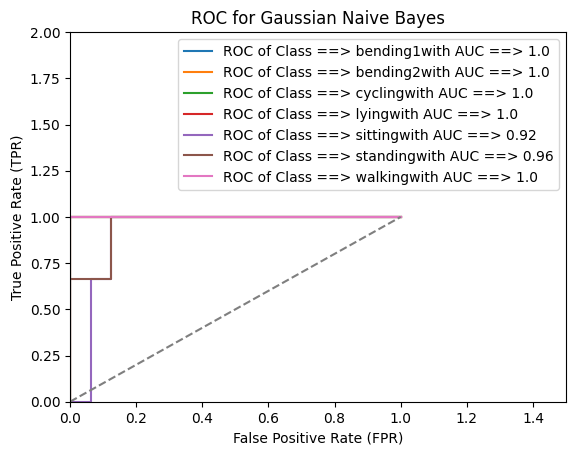

In [42]:
gaussian_temp_y = []
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

for x in range(0,len(gaussianTestY)):
    r = [0 for z in range(7)]
    
    r[gaussianTestY[x]] = 1
    gaussian_temp_y.append(r)

gaussian_temp_df = pd.DataFrame(data = gaussian_temp_y, columns=all_classes)
gm_p = gaussian_model.predict_proba(gaussianTestX)
gaussian_test_prob = {}
for x in range(len(all_classes)):
    gaussian_test_prob[all_classes[x]] = [f[x] for f in gm_p]
    
        
gaussian_class_auc = {}
false_pr = {}
true_pr = {}
for x in range(len(all_classes)):
    false_pr[x], true_pr[x], cc = roc_curve(gaussian_temp_df[all_classes[x]], gaussian_test_prob[all_classes[x]])
    gaussian_class_auc[x] = auc(false_pr[x], true_pr[x])
    
    
for x in range(len(all_classes)):
    plt.plot(false_pr[x], true_pr[x], label = 'ROC of Class ==> ' + all_classes[x] + "with AUC ==> " + str(round(gaussian_class_auc[x],2)))

plt.plot([0,1],[0,1], linestyle='dashed')
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.title("ROC for Gaussian Naive Bayes")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

In [43]:
gaussian_test_y = [z for z in gaussianTestY]
print(gaussian_test_y)
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

multi_confusion_matrix = confusion_matrix(gaussian_test_y, [z for z in gaussian_model.predict(gaussianTestX)])

temp_cols = [""]
temp_row = []
for x in all_classes:
    temp_cols.append("Predicted_"+x)
    
for x in range(len(all_classes)):
    c = ["Actual_"+all_classes[x]] + list(multi_confusion_matrix[x])
    temp_row.append(c)
    
gaussian_temp_df = pd.DataFrame(data=temp_row, columns=temp_cols)
display(gaussian_temp_df)

[0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6]


,,Predicted_bending1,Predicted_bending2,Predicted_cycling,Predicted_lying,Predicted_sitting,Predicted_standing,Predicted_walking
0,Actual_bending1,2,0,0,0,0,0,0
1,Actual_bending2,0,1,0,0,1,0,0
2,Actual_cycling,0,0,3,0,0,0,0
3,Actual_lying,0,0,0,3,0,0,0
4,Actual_sitting,0,0,0,0,3,0,0
5,Actual_standing,0,0,0,0,2,1,0
6,Actual_walking,0,0,0,0,0,0,3


<b> Multinomial Naive Bayes</b>

In [44]:
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
multi_naive_bayes_op = []
multi_naive_bayes_train_data = {}
## trying out all possible l
for curr_l in range(1,21):
    naiveb_training_data  = []
    naiveb_training_cols = []
    for x in considered_fts:
        for y in best_time_domain_fts:
            for k in range(1, curr_l+1):
                naiveb_training_cols.append(y + "_" + x + "___split" + str(k))

    naiveb_training_cols.append("class")
    
    for instance in train_data:
        path_loc = instance.split("/")
        this_class = path_loc[3]

        this_data = train_data[instance]
        this_row1 = []
        for f in considered_fts:
            arr = this_data[f]
            arr = np.array_split(arr,curr_l)
            for btdf in best_time_domain_fts:
                for ls in range(1,curr_l+1):
                    ftss = extract_ft_value(arr[ls-1], btdf)
                    this_row1.append(ftss)
                    
        this_row1.append(all_classes.index(this_class))
        naiveb_training_data.append(this_row1)
        
    naiveb_training_df = pd.DataFrame(data=naiveb_training_data, columns = naiveb_training_cols)
    ## at this point naiveb_training_df is ready to be used for this l
    ## starting logistic regression part
    acc_of_all_models = []
    startified_kfold = StratifiedKFold(n_splits = 5, shuffle = False)  ## to get equal proportion of bending and not-bending in all the folds
    for train_indx, val_indx in startified_kfold.split(naiveb_training_df[naiveb_training_cols[:-1]], naiveb_training_df['class']):
        ## Training Data
        nbTrainingX = []  ## <- This is Training X
        nbTrainingY = []  ## <- This is Training Y
        temp = []  ## <- This is Training Data (All columns of Training X and Training Y)
        
        for indices in train_indx:
            temp.append(naiveb_training_df[naiveb_training_cols].iloc[indices])
        temp = pd.DataFrame(temp)
        nbTrainingY = temp['class']
        nbTrainingX = temp.drop('class', axis = 1)
        
        ## Validation Data
        nbValidationX = []  ## <- This is Cross Validation X
        nbValidationY = []  ## <- This is Cross Validation Y
        temp2 = []  ## <- This is Cross Validation Data (All columns of Cross Validation X and Cross Validation Y)
        
        for indices in val_indx:
            temp2.append(naiveb_training_df[naiveb_training_cols].iloc[indices])
        temp2 = pd.DataFrame(temp2)
        
        nbValidationY = temp2['class']
        nbValidationX = temp2.drop('class', axis = 1)
        

        ## now here we know the best features
        ## making the final logistic regression model
        naive_bayes_multi = MultinomialNB()
        naive_bayes_multi = naive_bayes_multi.fit(nbTrainingX, nbTrainingY)
        
        ## acc on cross validation 
        validation_accuracy = naive_bayes_multi.score(nbValidationX, nbValidationY)
        acc_of_all_models.append(validation_accuracy)
    
    this_new_op = []
    this_new_op.append(curr_l)
    this_new_op.append(np.mean(acc_of_all_models))
    multi_naive_bayes_op.append(this_new_op)
    
    multi_naive_bayes_train_data[curr_l] = naiveb_training_df
    
final_op_columns = ["L", "Accuracy"]
multi_nb_df = pd.DataFrame(data=multi_naive_bayes_op, columns = final_op_columns)
display(multi_nb_df)
    

,L,Accuracy
0,1,0.796703
1,2,0.825275
2,3,0.825275
3,4,0.810989
4,5,0.782418
5,6,0.782418
6,7,0.796703
7,8,0.782418
8,9,0.768132
9,10,0.782418


In [45]:
multinb_max_acc = 0
multinb_best_l = -1

for indx, rows in multi_nb_df.iterrows():
    if rows['Accuracy'] > multinb_max_acc:
        multinb_max_acc = rows['Accuracy']
        multinb_best_l = rows['L']
        
print("Best Cross Validation Accuracy (Multinomial Naive Bayes) ==> ", multinb_max_acc)
print("Best L (Multinomial Naive Bayes) ==>", multinb_best_l)

Best Cross Validation Accuracy (Multinomial Naive Bayes) ==>  0.8252747252747253
Best L (Multinomial Naive Bayes) ==> 2.0


In [46]:
multinb_train_df = multi_naive_bayes_train_data[int(multinb_best_l)]
multinbY = multinb_train_df['class']
multinbX = multinb_train_df.drop('class', axis = 1)

multinb_model = MultinomialNB()
multinb_model = multinb_model.fit(multinbX, multinbY)

multinb_train_acc = multinb_model.score(multinbX, multinbY)
print("Train Accuracy (Multinomial Naive Bayes) ==>", multinb_train_acc)
print("Train Error (Multinomial Naive Bayes) ==>", 1- multinb_train_acc)

Train Accuracy (Multinomial Naive Bayes) ==> 0.9130434782608695
Train Error (Multinomial Naive Bayes) ==> 0.08695652173913049


In [47]:
## preparing the testing data
best_time_domain_fts = ["mean", "std", "median"]
bending_classes = ["bending1", "bending2"]
considered_fts = ["avg_rss12","var_rss12","avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

multinb_test_data  = []
multinb_test_cols = []
for x in considered_fts:
    for y in best_time_domain_fts:
        for k in range(1, int(multinb_best_l)+1):
            multinb_test_cols.append(y + "_" + x + "___split" + str(k))

multinb_test_cols.append("class")

for instance in test_data:
    path_loc = instance.split("/")
    this_class = path_loc[3]

    this_data = test_data[instance]
    this_row1 = []
    for f in considered_fts:
        arr = this_data[f]
        arr = np.array_split(arr,int(multinb_best_l))
        for btdf in best_time_domain_fts:
            for ls in range(1,int(multinb_best_l)+1):
                ftss = extract_ft_value(arr[ls-1], btdf)
                this_row1.append(ftss)

    this_row1.append(all_classes.index(this_class))
    multinb_test_data.append(this_row1)

multinb_test_df = pd.DataFrame(data=multinb_test_data, columns = multinb_test_cols)

multinbTestY = multinb_test_df['class']
multinbTestX = multinb_test_df.drop('class', axis=1)

multinb_test_acc = multinb_model.score(multinbTestX, multinbTestY)
print("Test Accuracy (Multinomial Naive Bayes) ==>", multinb_test_acc)
print("Test Error (Multinomial Naive Bayes) ==> ", 1 - multinb_test_acc)

Test Accuracy (Multinomial Naive Bayes) ==> 0.8421052631578947
Test Error (Multinomial Naive Bayes) ==>  0.1578947368421053


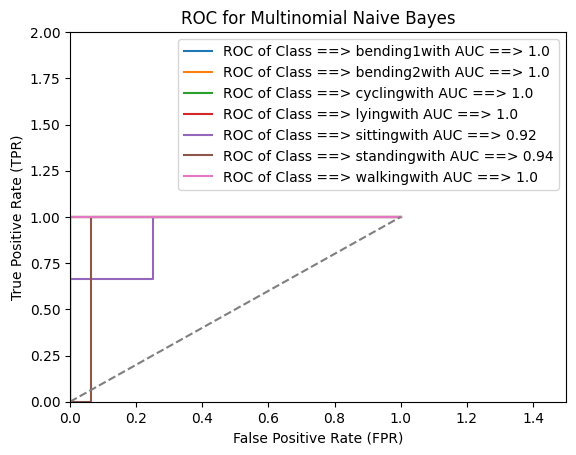

In [48]:
multinb_temp_y = []
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

for x in range(0,len(multinbTestY)):
    r = [0 for z in range(7)]
    
    r[multinbTestY[x]] = 1
    multinb_temp_y.append(r)

multinb_temp_df = pd.DataFrame(data = multinb_temp_y, columns=all_classes)
multinb_gm_p = multinb_model.predict_proba(multinbTestX)
multinb_test_prob = {}
for x in range(len(all_classes)):
    multinb_test_prob[all_classes[x]] = [f[x] for f in multinb_gm_p]
    
        
multinb_class_auc = {}
false_pr = {}
true_pr = {}
for x in range(len(all_classes)):
    false_pr[x], true_pr[x], cc = roc_curve(multinb_temp_df[all_classes[x]], multinb_test_prob[all_classes[x]])
    multinb_class_auc[x] = auc(false_pr[x], true_pr[x])
    
    
for x in range(len(all_classes)):
    plt.plot(false_pr[x], true_pr[x], label = 'ROC of Class ==> ' + all_classes[x] + "with AUC ==> " + str(round(multinb_class_auc[x],2)))

plt.plot([0,1],[0,1], linestyle='dashed')
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.title("ROC for Multinomial Naive Bayes")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

In [49]:
multinb_test_y = [z for z in multinbTestY]
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

multi_confusion_matrix = confusion_matrix(multinb_test_y, [z for z in multinb_model.predict(multinbTestX)])

temp_cols = [""]
temp_row = []
for x in all_classes:
    temp_cols.append("Predicted_"+x)
    
for x in range(len(all_classes)):
    c = ["Actual_"+all_classes[x]] + list(multi_confusion_matrix[x])
    temp_row.append(c)
    
multinb_temp_df = pd.DataFrame(data=temp_row, columns=temp_cols)
display(multinb_temp_df)

,,Predicted_bending1,Predicted_bending2,Predicted_cycling,Predicted_lying,Predicted_sitting,Predicted_standing,Predicted_walking
0,Actual_bending1,2,0,0,0,0,0,0
1,Actual_bending2,1,1,0,0,0,0,0
2,Actual_cycling,0,0,3,0,0,0,0
3,Actual_lying,0,0,0,3,0,0,0
4,Actual_sitting,0,0,0,0,2,1,0
5,Actual_standing,0,0,0,0,1,2,0
6,Actual_walking,0,0,0,0,0,0,3


In [50]:
nb_comparison_cols = ["Parameter", "Gaussian Naive Bayes", "Multinomial Naive Bayes", "Multiclass Logistic Regression"]
nb_comparison_rows = []
all_classes = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

r1 = ["Train Accuracy", gaussian_train_acc, multinb_train_acc, final_multiclass_train_acc]
r2 = ["Test Accuracy", gaussian_test_acc, multinb_test_acc, final_mutliclass_test_acc]

nb_comparison_rows.append(r1)
nb_comparison_rows.append(r2)


for x in range(len(all_classes)):
    r = [all_classes[x], gaussian_class_auc[x], multinb_class_auc[x], multi_class_auc[x]]
    nb_comparison_rows.append(r)
    
final_comparison_d = pd.DataFrame(data = nb_comparison_rows, columns = nb_comparison_cols)
display(final_comparison_d)


,Parameter,Gaussian Naive Bayes,Multinomial Naive Bayes,Multiclass Logistic Regression
0,Train Accuracy,0.956522,0.913043,0.971014
1,Test Accuracy,0.842105,0.842105,0.894737
2,bending1,1.000000,1.000000,1.000000
3,bending2,1.000000,1.000000,1.000000
4,cycling,1.000000,1.000000,1.000000
5,lying,1.000000,1.000000,1.000000
6,sitting,0.916667,0.916667,0.916667
7,standing,0.958333,0.937500,0.645833
8,walking,1.000000,1.000000,1.000000


In [51]:
print("From the above table we can conclude Multiclass logistic regression performs better on almost all classes")

From the above table we can conclude Multiclass logistic regression performs better on almost all classes


<b> Q.3 ISLR, 4.8.3 </b>

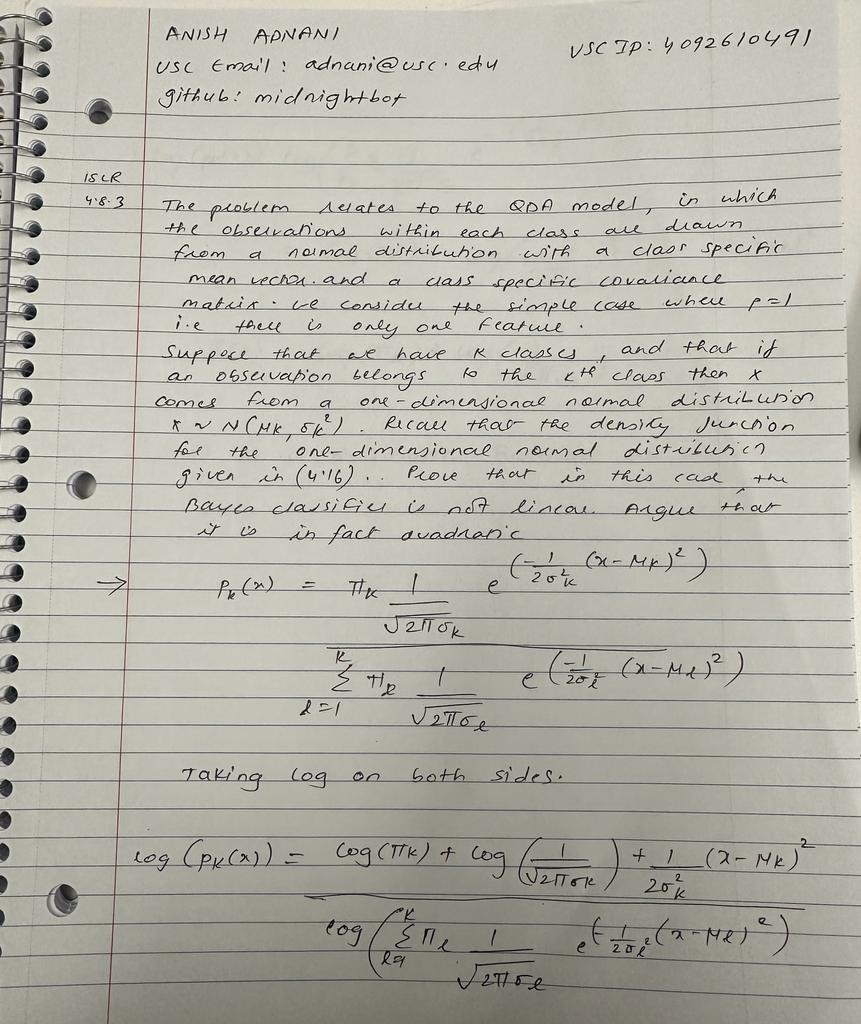

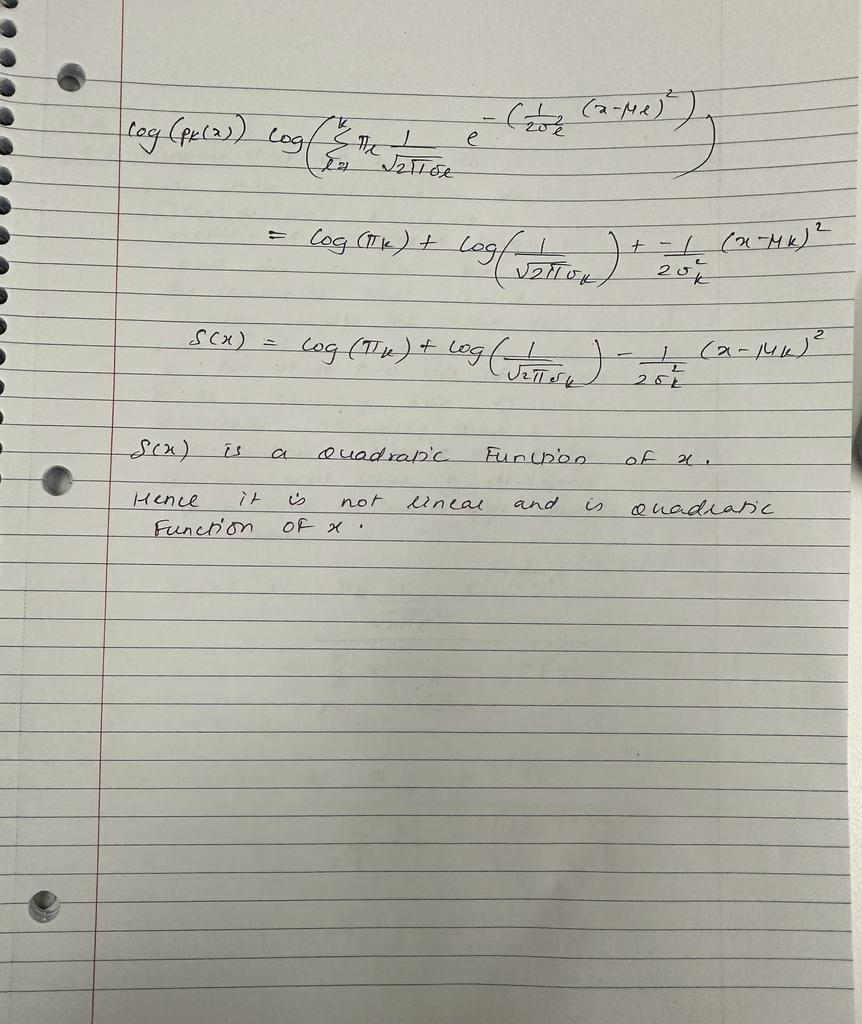

<b> Q.4 ISLR 4.8.7 </b>

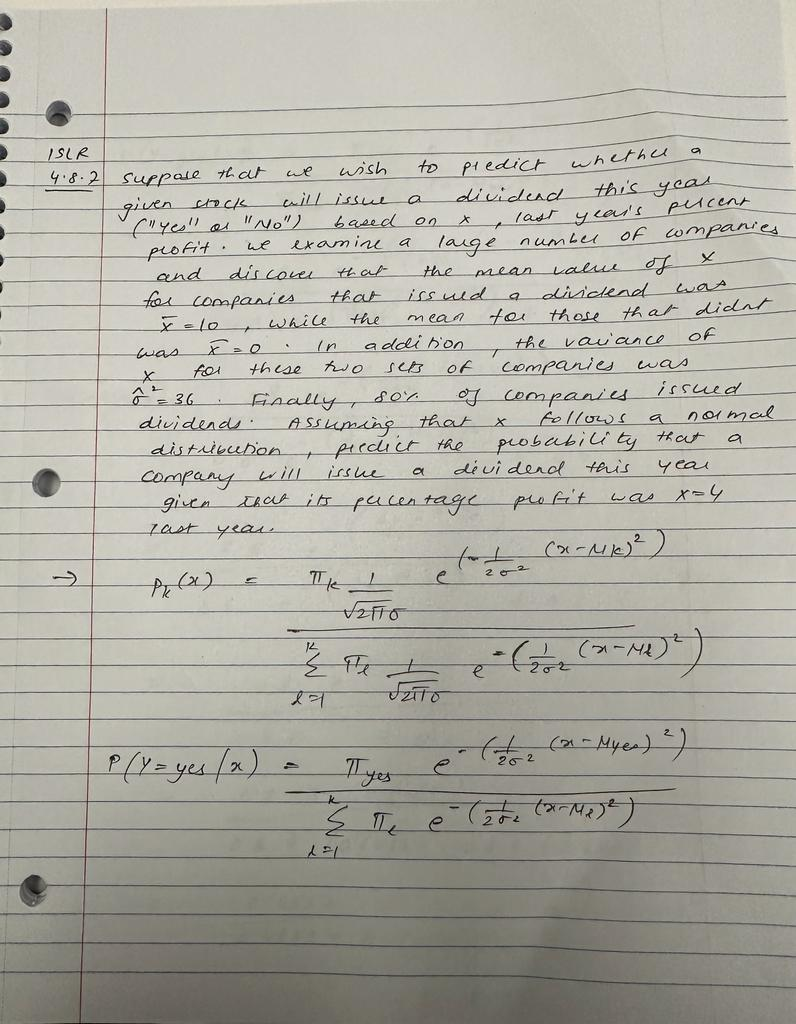

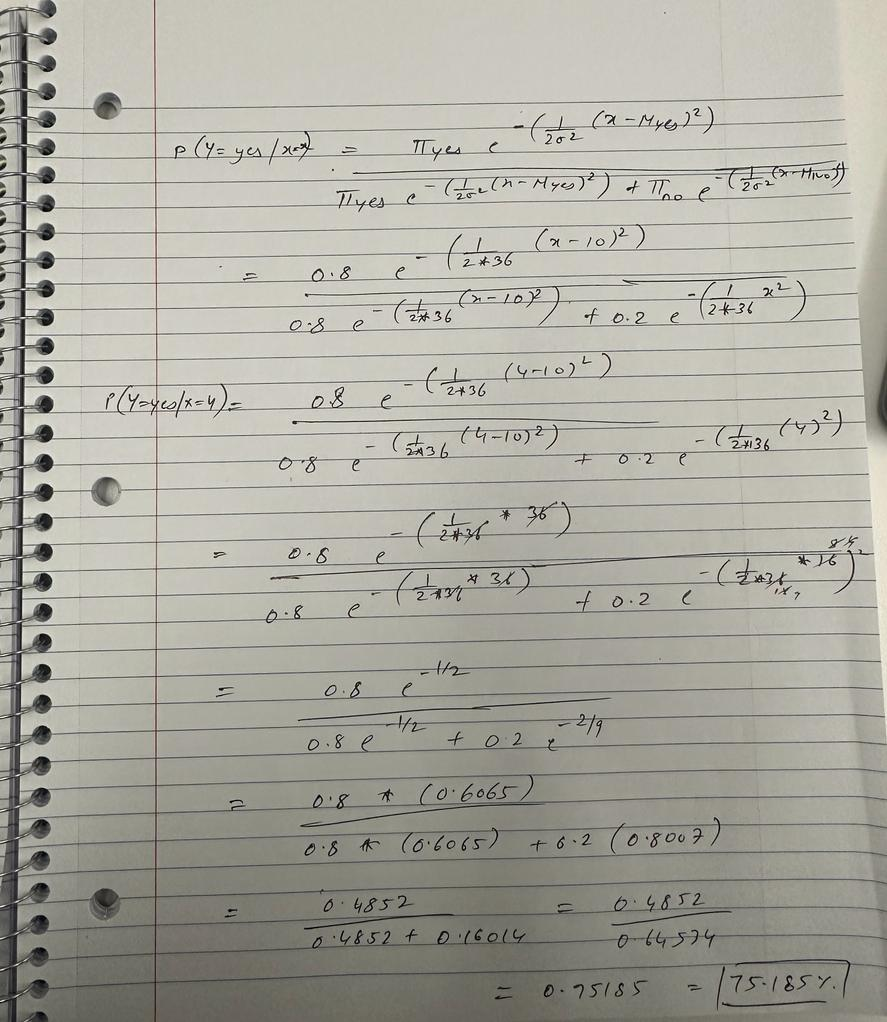